# Artificial Intelligence - Assignment 2

This notebook hosts the 2nd assignment for course IART of FEUP.

## Team Members

- Konstantaras Vasileios - up201911221
- Tsagkarakis Stylianos - up201911231

# Notes and description

## Deliverables

### Checkpoint // 11 May 2020


We should deliver a presentation containing:
- specification of the work to be carried out (definition of the learning problem (s) computational to be solved)
- work related to references to works found in the research (articles, web pages and / or source code)
- description of the tools and algorithms to be used at work 
- implementation work already done.

Update (19/05/2020): Presentation can be found [here](https://docs.google.com/presentation/d/1YqqlahjZ5YFfEblTEXXFRzdA8zj-pALusfRegZT0OzQ/edit?usp=sharing)

### Final // 27 May 2020

Submit three (3) files in Moodle:
- Presentation
    - PDF format
    - generated graphs
    - algorithms comparison
- Article
    - preferably LaTeX
    - PDF format
    - following the model to be made available in Moodle of the discipline
- Source code
    - properly commented
    - including a "readme.txt" with instructions

The paper (Article) should include:

- Title
- Authors and affiliations
- Abstract
    - Introduction
    - Description of the problem/datasets (or a section with a similar content)
    - Approach (or a section with a similar content)
    - Experimental evaluation (in which you should include any plots and tables with your results)
- Conclusions
- References


In case you are preparing a Python notebook with your code, you can include in the notebook these textual sections -- you DO NOT NEED to deliver a separate pdf file with the paper.

If not, you should prepare your paper following an IEEE template [here](https://www.ieee.org/conferences/publishing/templates.html)

### Presentation // 1-3 June 2020

There will be a demonstration of the work to the professors which should last ~15 minutes that should focus:
- in addition to the elements already described at the checkpoint
- all relevant aspects related to data processing
- developed models
- their evaluation and comparison
- using appropriate graphic elements.


## General guides // TODO

Build **classification** models, based on supervised learning algorithms, to a specific dataset.

1. We should implement at least 3 supervised learning algorithms.

    Examples:
    - Decision Trees
    - Neural Networks
    - k-Nearest Neighbor
    - Support Vector Machines
    - etc

2. We should compare the results obtained with different algorithms of learning and its parameterization, using approprate tables and graphic elements, through the use of [matplotlib](https://matplotlib.org/).


# Upgrade hosted runtime 

We generated ipynb in Google Colab

In [0]:
#Import libraries
import numpy as np
import pandas as pd
import sqlite3
from google.colab import files

from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
import itertools
from subprocess import check_output

In [0]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)

In [0]:
print("------------------------Countries--------------------")
print(countries.head(3))
print("------------------------Leagues----------------------")
print(leagues.head(3))
print("------------------------Matches----------------------")
print(matches.head(3))
print("------------------------Teams------------------------")
print(teams.head(3))
print("------------------------Players----------------------")
print(player.head(3))
print("------------------------Player attributes------------")
print(player_attributes.head(3))
print("------------------------Sequence---------------------")
print(sequence.head(7))
print("------------------------Team Attibutes---------------")
print(team_attributes.head(3))

------------------------Countries--------------------
     id     name
0     1  Belgium
1  1729  England
2  4769   France
------------------------Leagues----------------------
     id  country_id                    name
0     1           1  Belgium Jupiler League
1  1729        1729  England Premier League
2  4769        4769          France Ligue 1
------------------------Matches----------------------
   id  country_id  league_id     season  stage  ...   GBD   GBA   BSH   BSD   BSA
0   1           1          1  2008/2009      1  ...  3.25  4.00  1.73  3.40  4.20
1   2           1          1  2008/2009      1  ...  3.25  3.75  1.91  3.25  3.60
2   3           1          1  2008/2009      1  ...  3.20  2.50  2.30  3.20  2.75

[3 rows x 115 columns]
------------------------Teams------------------------
   id  team_api_id  team_fifa_api_id    team_long_name team_short_name
0   1         9987             673.0          KRC Genk             GEN
1   2         9993             675.0      Beer

# Initial Data Exploration

## Dataset


### Presentation

European Soccer Database by Hugo Mathien.

A soccer database that contains:

1. +25,000 matches
2. +10,000 players
3. 11 European Countries including their lead championship
4. Seasons 2008 to 2016
5. Players and Teams' attributes
6. 	Team line up with squad formation (X, Y coordinates)
7. 	Betting odds from up to 10 providers
8. 	Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

The dataset can be found below:
- [Kaggle](https://www.kaggle.com/hugomathien/soccer)
- [Dataset Search](https://datasetsearch.research.google.com/search?query=soccer&docid=bMqZ5yQDU%2BFr8Lp9AAAAAA%3D%3D)

In [0]:
import sqlite3
from google.colab import files

In [0]:
# only run this code once and download the "kaggle.json"
# following the instuctions here: https://www.kaggle.com/docs/api 
files.upload()
!mkdir ~/.kaggle
!cd ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [0]:
!kaggle datasets download -d hugomathien/soccer -p ~/content --force
!ls ~/content/ -ag
!cd ~/content/

 86% 28.0M/32.7M [00:01<00:00, 20.0MB/s]
100% 32.7M/32.7M [00:01<00:00, 25.1MB/s]
total 33508
drwxr-xr-x 2 root     4096 May 27 08:11 .
drwx------ 1 root     4096 May 27 08:11 ..
-rw-r--r-- 1 root 34297253 May 27 08:11 soccer.zip


### Statistical analysis of the dataset

Source: [EUROPEAN FOOTBALL DATA ANALYSIS](https://www.kaggle.com/pavanraj159/european-football-data-analysis/data)

In [0]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)

### Print a few entries of the dataset

In [0]:
print("------------------------Countries--------------------")
print(countries.head(3))
print("------------------------Leagues----------------------")
print(leagues.head(3))
print("------------------------Matches----------------------")
print(matches.head(3))
print("------------------------Teams------------------------")
print(teams.head(3))
print("------------------------Players----------------------")
print(player.head(3))
print("------------------------Player attributes------------")
print(player_attributes.head(3))
print("------------------------Sequence---------------------")
print(sequence.head(7))
print("------------------------Team Attibutes---------------")
print(team_attributes.head(3))

------------------------Countries--------------------
     id     name
0     1  Belgium
1  1729  England
2  4769   France
------------------------Leagues----------------------
     id  country_id                    name
0     1           1  Belgium Jupiler League
1  1729        1729  England Premier League
2  4769        4769          France Ligue 1
------------------------Matches----------------------
   id  country_id  league_id     season  stage  ...   GBD   GBA   BSH   BSD   BSA
0   1           1          1  2008/2009      1  ...  3.25  4.00  1.73  3.40  4.20
1   2           1          1  2008/2009      1  ...  3.25  3.75  1.91  3.25  3.60
2   3           1          1  2008/2009      1  ...  3.20  2.50  2.30  3.20  2.75

[3 rows x 115 columns]
------------------------Teams------------------------
   id  team_api_id  team_fifa_api_id    team_long_name team_short_name
0   1         9987             673.0          KRC Genk             GEN
1   2         9993             675.0      Beer

In [0]:
#Merge country and leauge data
countries_leagues = countries.merge(leagues,left_on="id",right_on="id",how="outer")
countries_leagues = countries_leagues.drop("id",axis = 1)
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})

In [0]:
countries_leagues.head(3)

,country,country_id,league
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1


In [0]:
matches.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.4,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.2,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.9,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.3,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.5,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [0]:
#subsetting data with necessary columns
matches_new = matches[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

matches_new = matches_new.drop("id",axis=1)

In [0]:
#merge leauge data with match data
data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")
#chech null values
data.isnull().sum()

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
league              0
dtype: int64

In [0]:
#Unique values in data
data.nunique()

country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
league                 11
dtype: int64

### Matches / Countries / Leagues

#### Matches by League

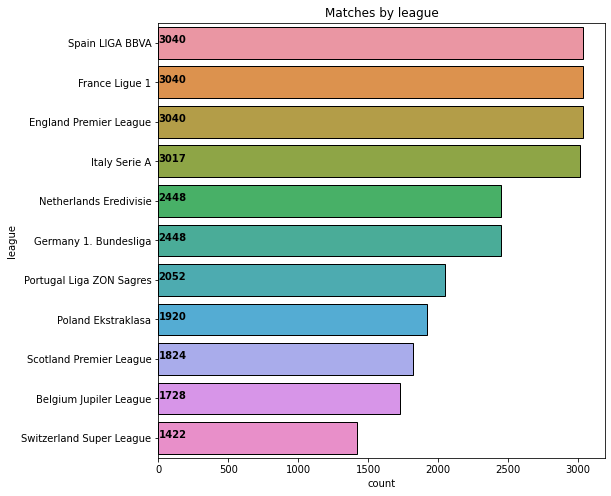

In [0]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y = data["league"],
                   order=data["league"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*data["league"].nunique()
                 )
for i,j in enumerate(data["league"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

#### Modifications to data

In [0]:
#Merge team data
data = data.merge(teams,left_on="home_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"home_team_lname",'team_short_name':"home_team_sname"})
data.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', 'home_team_lname',
       'home_team_sname'],
      dtype='object')

In [0]:
data = data.merge(teams,left_on="away_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"away_team_lname",'team_short_name':"away_team_sname"})
data.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', 'home_team_lname',
       'home_team_sname', 'away_team_lname', 'away_team_sname'],
      dtype='object')

#### Distribution of Home and Away goals


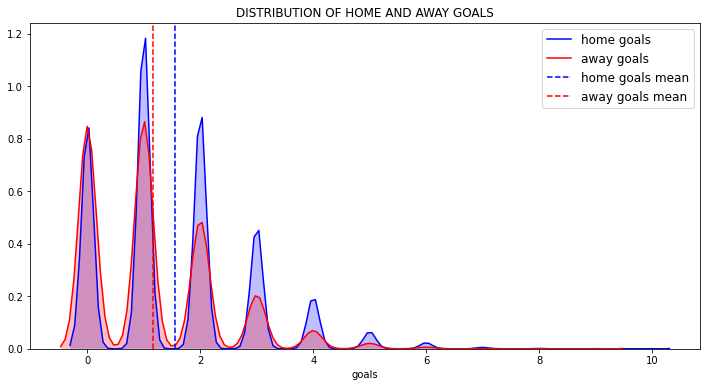

In [0]:
plt.figure(figsize=(12,6))
sns.kdeplot(data["home_team_goal"],shade=True,
            color="b",label="home goals")
sns.kdeplot(data["away_team_goal"],shade=True,
            color="r",label="away goals")
plt.axvline(data["home_team_goal"].mean(),linestyle = "dashed",
            color="b",label="home goals mean")
plt.axvline(data["away_team_goal"].mean(),linestyle = "dashed",
            color="r",label="away goals mean")
plt.legend(loc="best",prop = {"size" : 12})
plt.title("DISTRIBUTION OF HOME AND AWAY GOALS")
plt.xlabel("goals")
plt.show()

#### Interaction Between Teams

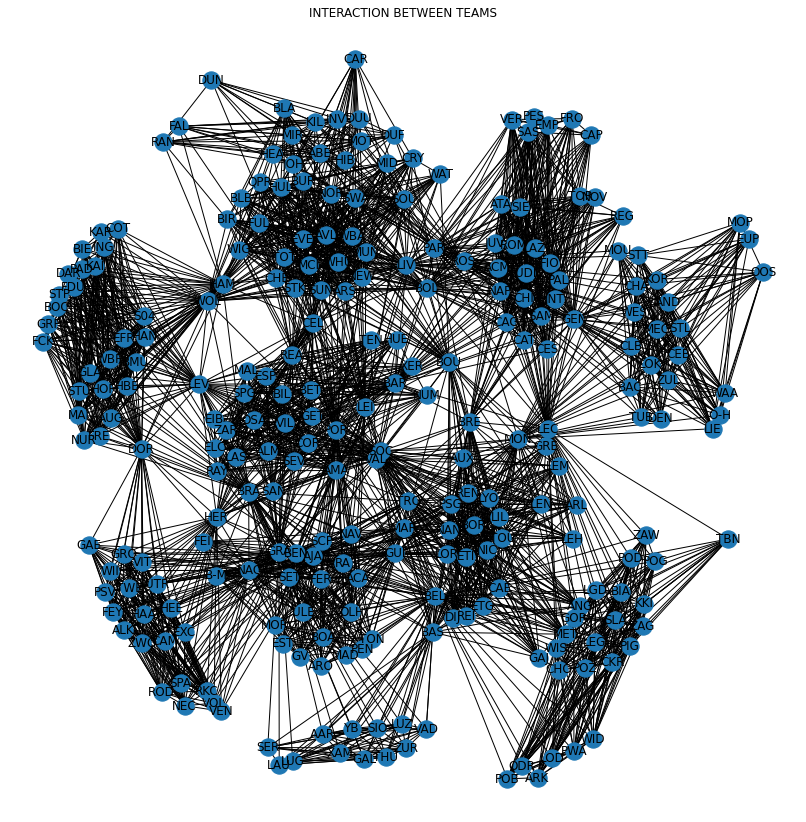

In [0]:
import networkx as nx

g = nx.from_pandas_edgelist(data,"home_team_sname","away_team_sname")
fig = plt.figure(figsize=(11,11))
nx.draw_kamada_kawai(g,with_labels = True)
plt.title("INTERACTION BETWEEN TEAMS")
fig.set_facecolor("white")

#### Create new feature win / tie / lose

In [0]:
#create new feature for winning team
def label(data):
    if data["home_team_goal"] > data["away_team_goal"]:
        return data["home_team_lname"]
    elif data["away_team_goal"] > data["home_team_goal"]:
        return data["away_team_lname"]
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"

#create new feature for outcome of match
def lab(data):
    if data["home_team_goal"] > data["away_team_goal"]:
        return "HOME TEAM WIN"
    elif data["away_team_goal"] > data["home_team_goal"]:
        return "AWAY TEAM WIN"
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"

#create new feature for losing team
def labe(data):
    if data["home_team_goal"] < data["away_team_goal"]:
        return data["home_team_lname"]
    elif data["away_team_goal"] < data["home_team_goal"]:
        return data["away_team_lname"]
    elif data["home_team_goal"] == data["away_team_goal"]:
        return "DRAW"

In [0]:
data["win"] = data.apply(lambda data:label(data),axis=1)
data["outcome_side"] = data.apply(lambda data:lab(data),axis = 1)

#### Proportion of Game Outcomes

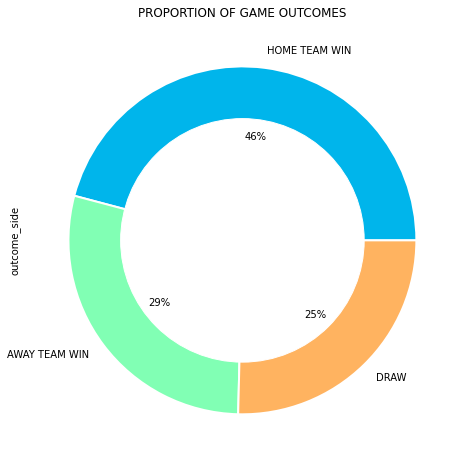

In [0]:
plt.figure(figsize=(8,8))
data["outcome_side"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF GAME OUTCOMES")
plt.show()

### Players

#### Player attributes

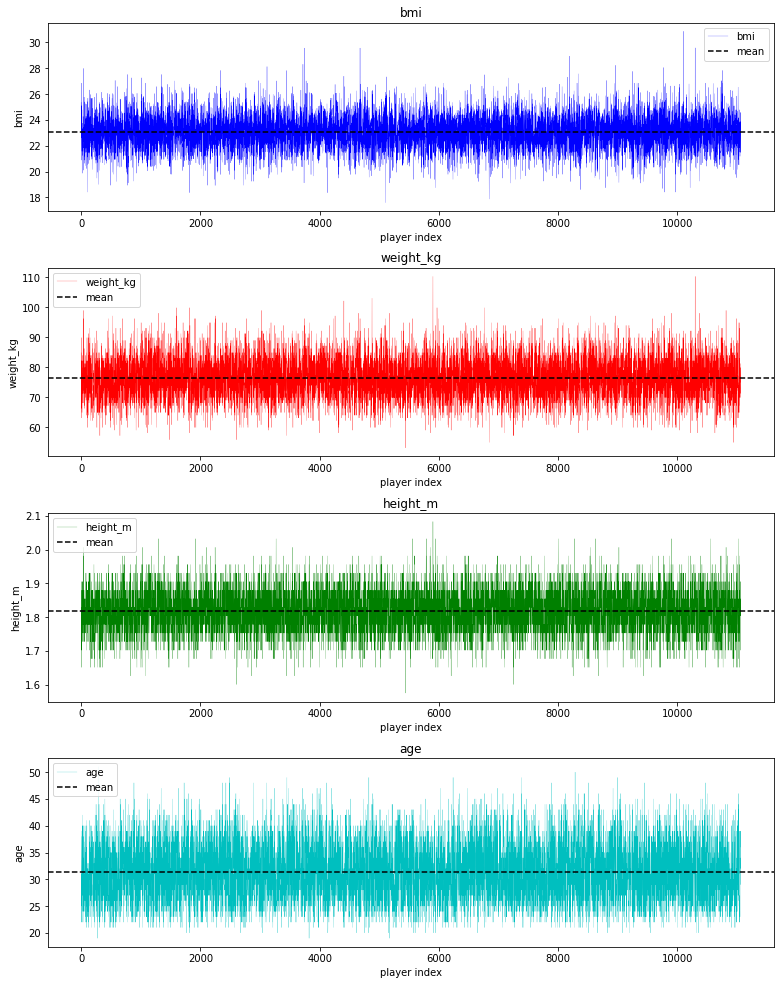

In [0]:
player["weight_kg"] = player["weight"] * 0.453592
player["height_m"]  = player["height"] / 100
player["bmi"]       = player["weight_kg"]/(player["height_m"] * player["height_m"])
player["year"]  = pd.DatetimeIndex(player["birthday"]).year
player["age"]   = 2018 - player["year"]

cols  = ["bmi","weight_kg","height_m","age"]
length = len(cols)
c = ["b","r","g","c"]
plt.figure(figsize=(13,17))
for i,j,k in itertools.zip_longest(cols,range(length),c):
    plt.subplot(4,1,j+1)
    player[i].plot(color = k ,linewidth =.2,label = i)
    plt.axhline(player[i].mean(),color = "k",linestyle = "dashed",label="mean")
    plt.legend(loc="best")
    plt.subplots_adjust(hspace = .3)
    plt.xlabel("player index")
    plt.ylabel(i)
    plt.title(i)


#### Normally Distributed Player Attributes


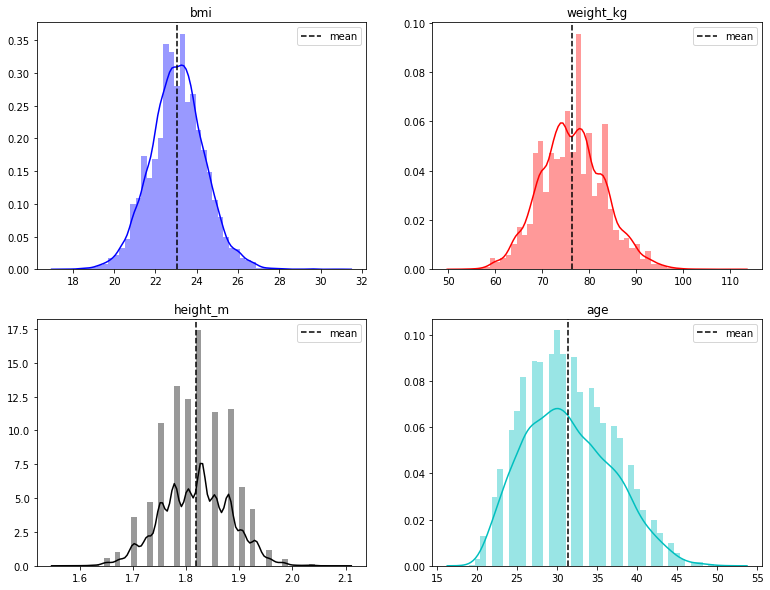

In [0]:
cols  = ["bmi","weight_kg","height_m","age"]
length = len(cols)
c = ["b","r","k","c"]
plt.figure(figsize=(13,10))

for i,j,k in itertools.zip_longest(cols,range(length),c):
    plt.subplot(2,2,j+1)
    sns.distplot(player[i],color=k)
    plt.axvline(player[i].mean(),color = "k",linestyle = "dashed",label="mean")
    plt.legend(loc="best")
    plt.title(i)
    plt.xlabel("")

## Data pre-processing

### General use functions

#### Utils

In [0]:
## UTILS

import sqlite3
import zipfile
import pandas as pd
import json
import datetime
import numpy as np

'''
FORMATTING CONSTANTS
'''
SEPARATOR = "***********************************************"

'''
INPUT DATA Constants
'''
INPUTFILE_DIR = "/root/content/"
INPUTZIPFILE = "soccer.zip"
DATABASENAME = "database.sqlite"

'''
SQL STATEMENTS
'''
SHOW_TABLES_SQL = "SELECT name FROM sqlite_master WHERE type='table' " \
                  "ORDER BY name;"
DESC_TABLES_SQL = "DESC"

AWAY_PLAYER_COLUMNS = ["away_player_1", "away_player_2", "away_player_3",
                       "away_player_4", "away_player_5", "away_player_6",
                       "away_player_7", "away_player_8", "away_player_9",
                       "away_player_10", "away_player_11"]

HOME_PLAYER_COLUMNS = ['home_player_1', 'home_player_2', 'home_player_3',
                       "home_player_4", "home_player_5", "home_player_6",
                       "home_player_7", "home_player_8", "home_player_9",
                       "home_player_10", "home_player_11"]

PLAYER_TYPES = ['Attacker', 'Defender', 'Goalkeeper', 'Midfielder']

# TODO: Move SKILL COLUMNS to Utils.py
SKILL_COLUMNS = ['finishing', 'sliding_tackle',
                 'gk_reflexes', 'short_passing']

def select_all_query_table(table_name):
  return "SELECT * from " + table_name

def sql_to_dataframe(conn, sql):
  df = pd.read_sql_query(sql, conn)
  return df


def map_country_to_name(countries_df, country_id):
  return countries_df.loc[countries_df['id'] == country_id, 'name']

#### Preprocess

In [0]:
######################## PRE-PROCESS ###########################

def uncompress_and_open_sqlite():
  zip = zipfile.ZipFile(INPUTFILE_DIR + INPUTZIPFILE)
  zip.extractall(path=INPUTFILE_DIR)
  conn = sqlite3.connect(INPUTFILE_DIR + DATABASENAME)
  return conn


def execute_query_print_results(conn, sql_query):
  cur = conn.cursor()
  cur.execute(sql_query)
  rows = cur.fetchall()
  for row in rows:
    print row


def desc_table(table_df, table_name):
  print SEPARATOR
  print "For table " + table_name + " there are " + str(table_df.shape[0]) + \
        " entries with " + str(table_df.shape[1]) + " features"
  print table_df.columns.tolist()
  print SEPARATOR


def home_advantage(matches_df, conn):
  # TODO: Convert to DataFrama and Plot
  country_id_to_num_matches = matches_df[['country_id', 'result_label']].copy()
  grouped_df = country_id_to_num_matches.\
    groupby(['country_id'], as_index=False).agg({'result_label':'count'}).rename(columns={'result_label': 'matches_per_country'})

  win_df = country_id_to_num_matches[country_id_to_num_matches['result_label']=='HOME_WIN']
  grouped_home_df = win_df. \
    groupby(['country_id'], as_index=False).agg({'result_label':'count'}).rename(columns={'result_label': 'home_wins_per_country'})
  join_df = pd.merge(grouped_df, grouped_home_df, on='country_id',
                            how='outer')
  join_df['percentage_home_win']= join_df.apply(
      lambda r: np.true_divide(r['home_wins_per_country'], r['matches_per_country']) * 100., axis=1)

  countries_df = sql_to_dataframe(conn, select_all_query_table("Country"))
  join_df_name = pd.merge(countries_df, join_df, left_on = 'id', right_on='country_id',
                          how='outer')
  return join_df_name[['name', 'percentage_home_win']]


def get_team_name_to_team_api_id_dict(team_df):
  team_name_to_team_api_id = dict(zip( team_df.team_long_name, team_df.team_api_id))
  return team_name_to_team_api_id

def get_team_api_dict_to_team_name(team_df):
  team_api_id_to_team_name = dict(zip(team_df.team_api_id, team_df.team_long_name))
  return team_api_id_to_team_name


# conn = uncompress_and_open_sqlite()
# get_team_name_to_team_api_id_dict()

#### Players

In [0]:
######################## PLAYERS ###########################

'''
Classify players into midfield, defense, attacking
'''
def player_to_player_type(players_skills, player_names_df, player_name,
    COLUMNS_OF_INTEREST):
  """
  Takes in as an input the relevant player skills and classifies into
  midfielder, attacker, defender or goalie; based on the most recent numbers
  from the database.
  """
  player_join_df = pd.merge(players_skills, player_names_df, on='player_api_id',
                            how='outer')
  my_player_df = (
    player_join_df[player_join_df['player_name'].str.contains(player_name)])
  most_recent_date = my_player_df['date'].max()
  latest_df = my_player_df[my_player_df['date'] == most_recent_date]
  latest_skills_df = latest_df[['finishing', 'sliding_tackle',
                                  'gk_reflexes', 'short_passing']]
  # TODO: Convert this to lambda function; see matches.result method
  latest_skills_df['player_type'] = latest_skills_df.idxmax(axis=1)
  latest_skills_df['player_name'] = player_name
  latest_skills_df['player_api_id'] = latest_df['player_api_id']
  latest_skills_df['player_type'] = np.where(latest_skills_df['player_type'] ==
                                             'finishing', 'Attacker', latest_skills_df['player_type'])
  latest_skills_df['player_type'] = np.where(latest_skills_df['player_type'] ==
                                             'short_passing', 'Midfielder', latest_skills_df['player_type'])
  latest_skills_df['player_type'] = np.where(latest_skills_df['player_type'] ==
                                             'sliding_tackle', 'Defender', latest_skills_df['player_type'])
  latest_skills_df['player_type'] = np.where(latest_skills_df['player_type'] ==
                                             'gk_reflexes', 'Goalkeeper', latest_skills_df['player_type'])

  return latest_skills_df[['player_name', 'player_type', 'player_api_id']]

def player_api_id_to_player_type(players_skills, COLUMNS_OF_INTEREST, player_api_id):
  """
  Takes in as an input the relevant player skills and classifies into
  midfielder, attacker, defender or goalie; based on the most recent numbers
  from the database.
  """
  my_player_df = players_skills[players_skills['player_api_id'] == player_api_id]
  most_recent_date = my_player_df['date'].max()
  latest_df = my_player_df[my_player_df['date'] == most_recent_date]
  latest_skills_df = latest_df[COLUMNS_OF_INTEREST]
  latest_skills_df['player_type'] = latest_skills_df.idxmax(axis=1)
  max_skill = latest_skills_df['player_type'].values[0]
  if max_skill == 'finishing':
    return 'Attacker'

  if max_skill == 'sliding_tackle':
    return 'Defender'

  if max_skill == 'short_passing':
    return 'Midfielder'

  if max_skill == 'gk_reflexes':
    return 'Goalkeeper'


def player_rating(player_api_id, last_date, players_ratings_label):
  """
  Gets the rating for a season for a player_api_id, based on the closest date
  :param player_api_id:
  :return:
  """
  all_player_ratings_df = players_ratings_label[players_ratings_label['player_api_id'] == player_api_id]
  pivot = datetime.datetime.strptime(last_date, "%Y-%m-%d").date()
  all_player_ratings_df.date = pd.to_datetime(all_player_ratings_df.date)
  min_date = (nearest(all_player_ratings_df.date, pd.to_datetime(last_date)))
  return all_player_ratings_df[all_player_ratings_df.date == min_date]

def nearest(items, pivot):
  value = min(items, key=lambda x: abs(pivot - x))
  return value

def average_team_rating(match_df):
  return None

In [0]:
import math

def matches_result(match_df):
  if match_df['home_team_goal'] > match_df['away_team_goal']:
    return 'HOME_WIN'
  elif match_df['home_team_goal'] == match_df['away_team_goal']:
    return 'DRAW'
  else:
    return 'AWAY_WIN'


def get_player_ratings_by_type(match_df, player_type_input, player_to_player_type_dict,
    players_ratings_label, last_date, team):
  # Away Team First
  n = 0
  ratings_sum = 0
  if team == 'away':
    PLAYER_COLUMNS = AWAY_PLAYER_COLUMNS
  else:
    PLAYER_COLUMNS = HOME_PLAYER_COLUMNS
  for PLAYER in PLAYER_COLUMNS:
    player_api_id = match_df[PLAYER]
    # TODO: Get from dict
    player_type = player_to_player_type_dict[str(int(player_api_id))]
    if player_type not in PLAYER_TYPES:
      print "Unknown player type " + player_type
      raise Exception
    if player_type == player_type_input:
      n =n + 1
      rating_df = player_rating(player_api_id = player_api_id,
                                        last_date=last_date,
                                        players_ratings_label=players_ratings_label)
      ratings_sum = ratings_sum + rating_df['overall_rating'].values[0]

  if (n == 0):
    return 0
  else:
    type_rating = ratings_sum/n
    return type_rating


def single_match_rating(match_df, players_ratings_label,
          player_to_player_type_dict, player_type_input, team_type ):
  last_date=match_df['date'].split(' ')[0]
  if match_df[0] % 1000 == 0:
    print "Done with " + str(match_df['id']) + "samples"
  rating = (get_player_ratings_by_type(match_df = match_df , player_type_input=player_type_input,
                                              player_to_player_type_dict=player_to_player_type_dict,
                                               players_ratings_label=players_ratings_label, last_date=last_date,
                                               team=team_type))

  return rating

player_api_id_season_rating_dict = dict()

def top_players_in_team(match_df, players_ratings_label, team_type, TOP_PLAYER_THRESHOLD):
  if match_df[0] % 100 == 0:
    print "Done with " + str(match_df['id']) + "samples"
  if team_type == 'away':
    PLAYER_COLUMNS = AWAY_PLAYER_COLUMNS
  else:
    PLAYER_COLUMNS = HOME_PLAYER_COLUMNS

  total_top_players = 0
  last_date=match_df['date'].split(' ')[0]
  current_season = match_df['season']
  for PLAYER in PLAYER_COLUMNS:
    player_api_id = match_df[PLAYER]
    if player_api_id in player_api_id_season_rating_dict:
      if current_season in player_api_id_season_rating_dict[player_api_id]:
        rating = player_api_id_season_rating_dict[player_api_id][current_season]
      else:
        rating_df = player_rating(player_api_id = player_api_id,
                                          last_date=last_date,
                                          players_ratings_label=players_ratings_label)
        rating = rating_df['overall_rating'].values[0]
        player_api_id_season_rating_dict[player_api_id][current_season] = rating
    else:
      rating_df = player_rating(player_api_id = player_api_id,
                                        last_date=last_date,
                                        players_ratings_label=players_ratings_label)
      rating = rating_df['overall_rating'].values[0]
      player_api_id_season_rating_dict[player_api_id] = dict()
      player_api_id_season_rating_dict[player_api_id][current_season] = rating
    if rating >= TOP_PLAYER_THRESHOLD:
      total_top_players = total_top_players + 1
  return total_top_players


def bottom_players_in_team(match_df, players_ratings_label, team_type, BOTTOM_PLAYER_THRESHOLD):
  if match_df[0] % 100 == 0:
    print "Done with " + str(match_df['id']) + "samples"

  if team_type == 'away':
    PLAYER_COLUMNS = AWAY_PLAYER_COLUMNS
  else:
    PLAYER_COLUMNS = HOME_PLAYER_COLUMNS

  total_bottom_players = 0
  last_date=match_df['date'].split(' ')[0]
  current_season = match_df['season']
  for PLAYER in PLAYER_COLUMNS:
    player_api_id = match_df[PLAYER]
    if player_api_id in player_api_id_season_rating_dict:
      if current_season in player_api_id_season_rating_dict[player_api_id]:
        rating = player_api_id_season_rating_dict[player_api_id][current_season]
      else:
        rating_df = player_rating(player_api_id = player_api_id,
                                      last_date=last_date,
                                      players_ratings_label=players_ratings_label)
        rating = rating_df['overall_rating'].values[0]
        player_api_id_season_rating_dict[player_api_id][current_season] = rating
    else:
      rating_df = player_rating(player_api_id = player_api_id,
                                        last_date=last_date,
                                        players_ratings_label=players_ratings_label)
      rating = rating_df['overall_rating'].values[0]
      player_api_id_season_rating_dict[player_api_id] = dict()
      player_api_id_season_rating_dict[player_api_id][current_season] = rating
    if rating <= BOTTOM_PLAYER_THRESHOLD:
      total_bottom_players = total_bottom_players + 1
  return total_bottom_players

In [0]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py, renamed as visuals_udacity.py. I have taken this code from the Udacity
# machine learning projects
# from Utils import *

# Pretty display for notebooks
%matplotlib inline
conn = uncompress_and_open_sqlite()
print("------------------------Players----------------------")
players_df = sql_to_dataframe(conn, select_all_query_table("Player_Attributes"))
display(players_df.head(n=4))
print("------------------------Teams------------------------")
teams_df = sql_to_dataframe(conn, select_all_query_table("Team_Attributes"))
display(teams_df.head(n=1))
print("------------------------Matches----------------------")
match_df = sql_to_dataframe(conn, select_all_query_table("Match"))
display(match_df.head(n=1))

------------------------Players----------------------


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


------------------------Teams------------------------


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


------------------------Matches----------------------


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.4,5.0,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.7,3.3,4.33,1.9,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


### Defining the data features and labels

* Players : 

In [0]:
players_skills = players_df[['player_api_id', 'finishing', 'sliding_tackle', 'gk_reflexes', 'short_passing', 'date']]
players_ratings_label = players_df[['player_api_id','date', 'overall_rating']]
# players_features_df = players_df.drop(['date', 'overall_rating', 'potential'], axis=1)
players_features_df = players_df.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential'], axis=1)
display(players_features_df.head(n=1))

,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


* Teams
No output label. I'll drop the metadata to get features.

In [0]:
teams_features_df = teams_df.drop(['id', 'team_fifa_api_id', 'team_api_id', 'date'], axis=1)
display(teams_features_df.head(n=1))

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


### Generating output labels

The matches have the goals score information (by home and away) teams; however don't have a label. We are generating a label, based on the goals scored.


**Get match results**

In the following code cell, we apply a lambda function to get the result label as either ['Home Win', 'Away Win', 'Draw']. 

In [0]:
match_df['result_label'] = match_df.apply(matches_result, axis = 1)
display(match_df.result_label.sample(n=10))

19579    HOME_WIN
7701         DRAW
2370         DRAW
5681     HOME_WIN
19053    AWAY_WIN
22979    HOME_WIN
22203    HOME_WIN
1051         DRAW
25483    HOME_WIN
10103        DRAW
Name: result_label, dtype: object

### Defining the base classifier: The home advantage
Now that we have our labels defined, let us define the **baseline classifier**.
Home advantage is real, as mentioned in the Kaggle link, as well as here: http://bleacherreport.com/articles/1604854-how-much-does-home-field-advantage-matter-in-soccer. Lets analyze the home advantage across different leagues.

In [0]:
home_advantage_per_country = home_advantage(matches_df=match_df, conn=conn)
display(home_advantage_per_country)
total_num_matches = match_df.shape[0]
total_home_wins = match_df[match_df['result_label'] == 'HOME_WIN'].shape[0]
total_away_wins = match_df[match_df['result_label'] == 'AWAY_WIN'].shape[0]
print ("Home Wins occur about " + str(np.around(np.true_divide(total_home_wins, total_num_matches) * 100, decimals = 2)) + " % of the time")
print ("Away Wins occur about " + str(np.around(np.true_divide(total_away_wins, total_num_matches) * 100, decimals = 2)) + " % of the time")

,name,percentage_home_win
0,Belgium,46.875000
1,England,45.723684
2,France,44.703947
3,Germany,45.220588
4,Italy,46.635731
5,Netherlands,47.834967
6,Poland,45.312500
7,Portugal,44.249513
8,Scotland,41.666667
9,Spain,48.848684


Home Wins occur about 45.87 % of the time
Away Wins occur about 28.74 % of the time


#### Observations:
Home advantage is indeed real; and consistent across all countries. ALWAYS predicting a home win would result us in being correct 46% of the time; and therefore our **baseline accuracy with a naive model is 46%.**
We would like to use this to some effect while engineering features. We believe such stats might help:
* Home team's track record playing at home
* Away team's track record playing away 
* Away team's track record playing at the location the current match is at

More on this in the section on features.

#### Visualizing player ratings
A histogram visualization to view player distributions in terms of ratings will be helpful. We will be using this to gain intution for features such as 'players_in_top_X_percent'. Sometimes a single ***star player*** can win a match for their team; and that is our intuition behind these features.

(63.5, 73.667]      0.530580
(73.667, 83.833]    0.230843
(53.333, 63.5]      0.197029
(43.167, 53.333]    0.022057
(83.833, 94.0]      0.013904
(32.938, 43.167]    0.001044
Name: overall_rating, dtype: float64

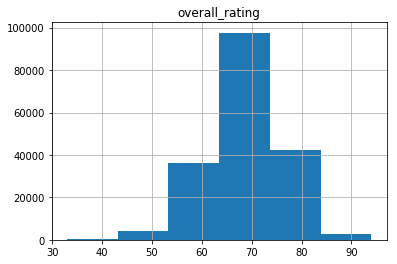

In [0]:
import matplotlib.pyplot as plt
from functools import partial
# Visualize player ratings
players_df.hist(column= 'overall_rating', bins = 6)
players_df['overall_rating'].value_counts(bins = 6, normalize=True)

### Handling Bad Data

The Kaggle page does say that some input values are missing, and indeed it does. In this code block, we wish to eliminate some of the data where features we think are relevant (more discussion on this in the section on Feature generation). The columns are defined in the general functions cell. For now, we will be focusing on the match dataframe.

For this we use the *dropna* method in pandas. We certainly do not want to blindly check for validity of all columns in the match; a lot of it is information we don't think is necessary for prediction (bettting data, corners for example); atleast for the problem of determining match results.

Therefore we define the columns IMPORTANT to us, in the aptly named variable.
Luckily, even if we drop the data if ***any*** of the player ratings is absent, We do not lose a lot of data; as shown in the example below.

In [0]:
IMPORTANT_COLUMNS = AWAY_PLAYER_COLUMNS + HOME_PLAYER_COLUMNS
print ("Number of samples before removing cases of no data: " + str(match_df.shape[0]))
match_clean_data_df = match_df.dropna(axis = 0, how = 'any', subset = IMPORTANT_COLUMNS)
print ("Number of samples after removing cases of no data: " + str(match_clean_data_df.shape[0]))

Number of samples before removing cases of no data: 25979
Number of samples after removing cases of no data: 21374


# Feature Selection



In this section, we generate some features from the given match data, that we think are relevant from our domain knowledge of football.

### Utility APIs for features
The following code blocks demonstrates the use of some util methods we have in our code, to help get some features from the raw data for the task of match prediction.

#### Acknowledgement
Thanks to the author of https://www.kaggle.com/harvinderwazir/match-outcome-prediction-in-football/notebook ; for neatly putting up the relevant column names for a particular task!

#### Classify a player into midfield, attack and defense

Takes in as an input the relevant player skills and classifies into midfielder, attacker, defender or goalkeeper; based on the most recent numbers from the database. Here we validate our method against the famous players (3 of each of the 4 types) who we know we can classify into the aforementioned categories.
As can be seem from the results, our method takes a good decision from the columns of interest. The reason we wish to make this distinction is to better divide a team's rating based on players into defense, attack and midfield; rather than an overall average rating. We will be using this more further in the section on Features's Generation.

#### Introduction

In [0]:
player_names_df = sql_to_dataframe(conn, select_all_query_table("Player"))
FAMOUS_PLAYER_NAMES = ['Lionel Messi', 'Cristiano Ronaldo', 'Didier Drogba', 'John Terry', 
                'Rio Ferdinand', 'Gerard Pique', 'Petr Cech', 'Iker Casillas', 
                'Joe Hart', 'Frank Lampard', 'Xavi Hernandez', 'Andres Iniesta']
COLUMNS_OF_INTEREST = ['player_name', 'finishing', 'sliding_tackle',
                     'gk_reflexes', 'short_passing']
for player in FAMOUS_PLAYER_NAMES:
    display(player_to_player_type(players_skills=players_skills, player_names_df=player_names_df, 
                                      player_name=player, COLUMNS_OF_INTEREST=COLUMNS_OF_INTEREST))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

,player_name,player_type,player_api_id
102482,Lionel Messi,Attacker,30981


,player_name,player_type,player_api_id
33330,Cristiano Ronaldo,Attacker,30893


,player_name,player_type,player_api_id
43418,Didier Drogba,Attacker,30822


,player_name,player_type,player_api_id
84848,John Terry,Defender,30627


,player_name,player_type,player_api_id
149835,Rio Ferdinand,Defender,30620


,player_name,player_type,player_api_id
62977,Gerard Pique,Defender,37482


,player_name,player_type,player_api_id
142868,Petr Cech,Goalkeeper,30859


,player_name,player_type,player_api_id
72590,Iker Casillas,Goalkeeper,30657


,player_name,player_type,player_api_id
83352,Joe Hart,Goalkeeper,31432


,player_name,player_type,player_api_id
59244,Frank Lampard,Midfielder,30631


,player_name,player_type,player_api_id
180709,Xavi Hernandez,Midfielder,39854


,player_name,player_type,player_api_id
12773,Andres Iniesta,Midfielder,30955


I will now run this on all players and create a lookup dictionary to look up player type by player ID; this will speed up the later process of aggregating team ratings by type. *Note that the assumption here is that a player does not change his type on the field, therefore we just use the latest value for his skills to determine his type.*

In [0]:
unique_player_list = set(players_skills['player_api_id'].tolist())
player_to_player_type_dict=dict()
import json

# TODO: Move SKILL COLUMNS to Utils.py
player_num = 0
for player_api_id in unique_player_list:
    player_num = player_num + 1
    if player_num % 1000 == 0:
        print ("Done with " + str(player_num) + " players")
    player_to_player_type_dict[player_api_id] = player_api_id_to_player_type(players_skills=players_skills, 
                                                               COLUMNS_OF_INTEREST=SKILL_COLUMNS,
                                                               player_api_id=player_api_id)
with open('player_to_player_type.json', 'w+') as outfile:
     json.dump(player_to_player_type_dict, outfile, indent = 4,
               ensure_ascii = False)
print "Done creating the dictionary and wrote to file"

#### Get Average Player Ratings For Match
Takes as an input a match, and returns back the ratings in the form of [midfielder_rating, attacker_rating, defender_rating, goalie_rating] for both the teams. Note that the ratings are based on the first ratings back in time I can find from that season; this is because every player has multiple ratings spread across time. For eg. for 2012-13, I will look for the date closest to Dec 31 2012 and take the player's ratings for that date.

Sometimes, I observed a team has no attacking players (rare, but not impossible); a team might decide to just play defenders and midfielders. In that case, I assign the attacking rating as 0.

Demonstrating the use of both APIs in the code cell below.

In [0]:

with open('player_to_player_type.json') as data_file:    
    player_to_player_type_dict = json.load(data_file)   
player_types= PLAYER_TYPES
# Just for generating features..

player_types= ['Defender', 'Attacker', 'Goalkeeper', 'Midfielder']
team_types=['away', 'home']
display(match_clean_data_df.head(n=1))

# USE THIS TO COMBINE: https://stackoverflow.com/questions/19125091/pandas-merge-how-to-avoid-duplicating-columns --> #USE SUFFIXES
FEATURE_COLUMNS = []
for player_type_input in player_types:
    for team_type in team_types:
        FEATURE = team_type + "_" + player_type_input + "_rating"
        FEATURE_COLUMNS.append(FEATURE)
        print ("Evaulating feature " + FEATURE)
        get_feature = partial(single_match_rating,players_ratings_label=players_ratings_label, 
                             player_to_player_type_dict=player_to_player_type_dict, 
                              player_type_input=player_type_input, team_type=team_type)
        match_clean_data_df[FEATURE] = match_clean_data_df.apply(get_feature, axis = 1)

        COLUMNS_TO_SAVE = ['match_api_id', 'home_team_api_id', 'away_team_api_id', 'season', 'date', 'result_label'] + FEATURE_COLUMNS
        display(match_clean_data_df[COLUMNS_TO_SAVE].head(n=10))
        match_clean_data_df[COLUMNS_TO_SAVE].to_csv("match_features_so_far_3.csv")

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,result_label
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,38782.0,None,None,None,None,None,None,None,None,3.0,3.4,2.3,2.95,3.25,2.2,2.8,3.1,2.2,2.75,3.25,2.2,NaN,NaN,NaN,2.62,3.2,2.3,3.05,3.2,2.3,2.65,3.25,2.35,2.9,3.25,2.3,2.8,3.2,2.25,HOME_WIN


Evaulating feature away_Defender_rating


/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples
Done with 25000samples


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,match_api_id,home_team_api_id,away_team_api_id,season,date,result_label,away_Defender_rating
145,493017,8203,9987,2008/2009,2009-02-27 00:00:00,HOME_WIN,61.000000
153,493025,9984,8342,2008/2009,2009-03-08 00:00:00,AWAY_WIN,67.333333
155,493027,8635,10000,2008/2009,2009-03-07 00:00:00,HOME_WIN,56.666667
162,493034,8203,8635,2008/2009,2009-03-13 00:00:00,HOME_WIN,69.250000
168,493040,10000,9999,2008/2009,2009-03-14 00:00:00,DRAW,58.500000
173,493045,9991,10000,2008/2009,2009-03-22 00:00:00,HOME_WIN,55.000000
176,493048,9999,8203,2008/2009,2009-03-21 00:00:00,HOME_WIN,55.000000
189,493061,8635,8342,2008/2009,2009-04-12 00:00:00,HOME_WIN,67.333333
190,493062,9999,9987,2008/2009,2009-04-10 00:00:00,HOME_WIN,65.500000
217,493080,9984,9987,2008/2009,2009-04-26 00:00:00,AWAY_WIN,65.600000


Evaulating feature home_Defender_rating
Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples
Done with 25000samples


,match_api_id,home_team_api_id,away_team_api_id,season,date,result_label,away_Defender_rating,home_Defender_rating
145,493017,8203,9987,2008/2009,2009-02-27 00:00:00,HOME_WIN,61.000000,53.333333
153,493025,9984,8342,2008/2009,2009-03-08 00:00:00,AWAY_WIN,67.333333,64.000000
155,493027,8635,10000,2008/2009,2009-03-07 00:00:00,HOME_WIN,56.666667,70.500000
162,493034,8203,8635,2008/2009,2009-03-13 00:00:00,HOME_WIN,69.250000,55.000000
168,493040,10000,9999,2008/2009,2009-03-14 00:00:00,DRAW,58.500000,61.333333
173,493045,9991,10000,2008/2009,2009-03-22 00:00:00,HOME_WIN,55.000000,66.666667
176,493048,9999,8203,2008/2009,2009-03-21 00:00:00,HOME_WIN,55.000000,58.500000
189,493061,8635,8342,2008/2009,2009-04-12 00:00:00,HOME_WIN,67.333333,71.250000
190,493062,9999,9987,2008/2009,2009-04-10 00:00:00,HOME_WIN,65.500000,58.500000
217,493080,9984,9987,2008/2009,2009-04-26 00:00:00,AWAY_WIN,65.600000,63.333333


Evaulating feature away_Attacker_rating
Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples
Done with 25000samples


,match_api_id,home_team_api_id,away_team_api_id,season,date,result_label,away_Defender_rating,home_Defender_rating,away_Attacker_rating
145,493017,8203,9987,2008/2009,2009-02-27 00:00:00,HOME_WIN,61.000000,53.333333,68.250000
153,493025,9984,8342,2008/2009,2009-03-08 00:00:00,AWAY_WIN,67.333333,64.000000,70.500000
155,493027,8635,10000,2008/2009,2009-03-07 00:00:00,HOME_WIN,56.666667,70.500000,58.000000
162,493034,8203,8635,2008/2009,2009-03-13 00:00:00,HOME_WIN,69.250000,55.000000,69.500000
168,493040,10000,9999,2008/2009,2009-03-14 00:00:00,DRAW,58.500000,61.333333,64.000000
173,493045,9991,10000,2008/2009,2009-03-22 00:00:00,HOME_WIN,55.000000,66.666667,57.000000
176,493048,9999,8203,2008/2009,2009-03-21 00:00:00,HOME_WIN,55.000000,58.500000,62.333333
189,493061,8635,8342,2008/2009,2009-04-12 00:00:00,HOME_WIN,67.333333,71.250000,70.500000
190,493062,9999,9987,2008/2009,2009-04-10 00:00:00,HOME_WIN,65.500000,58.500000,66.750000
217,493080,9984,9987,2008/2009,2009-04-26 00:00:00,AWAY_WIN,65.600000,63.333333,70.000000


Evaulating feature home_Attacker_rating
Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples
Done with 25000samples


,match_api_id,home_team_api_id,away_team_api_id,season,date,result_label,away_Defender_rating,home_Defender_rating,away_Attacker_rating,home_Attacker_rating
145,493017,8203,9987,2008/2009,2009-02-27 00:00:00,HOME_WIN,61.000000,53.333333,68.250000,59.000000
153,493025,9984,8342,2008/2009,2009-03-08 00:00:00,AWAY_WIN,67.333333,64.000000,70.500000,66.000000
155,493027,8635,10000,2008/2009,2009-03-07 00:00:00,HOME_WIN,56.666667,70.500000,58.000000,67.000000
162,493034,8203,8635,2008/2009,2009-03-13 00:00:00,HOME_WIN,69.250000,55.000000,69.500000,62.333333
168,493040,10000,9999,2008/2009,2009-03-14 00:00:00,DRAW,58.500000,61.333333,64.000000,58.000000
173,493045,9991,10000,2008/2009,2009-03-22 00:00:00,HOME_WIN,55.000000,66.666667,57.000000,67.500000
176,493048,9999,8203,2008/2009,2009-03-21 00:00:00,HOME_WIN,55.000000,58.500000,62.333333,64.000000
189,493061,8635,8342,2008/2009,2009-04-12 00:00:00,HOME_WIN,67.333333,71.250000,70.500000,69.000000
190,493062,9999,9987,2008/2009,2009-04-10 00:00:00,HOME_WIN,65.500000,58.500000,66.750000,64.000000
217,493080,9984,9987,2008/2009,2009-04-26 00:00:00,AWAY_WIN,65.600000,63.333333,70.000000,62.000000


Evaulating feature away_Goalkeeper_rating
Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples
Done with 25000samples


,match_api_id,home_team_api_id,away_team_api_id,season,date,result_label,away_Defender_rating,home_Defender_rating,away_Attacker_rating,home_Attacker_rating,away_Goalkeeper_rating
145,493017,8203,9987,2008/2009,2009-02-27 00:00:00,HOME_WIN,61.000000,53.333333,68.250000,59.000000,62.0
153,493025,9984,8342,2008/2009,2009-03-08 00:00:00,AWAY_WIN,67.333333,64.000000,70.500000,66.000000,73.0
155,493027,8635,10000,2008/2009,2009-03-07 00:00:00,HOME_WIN,56.666667,70.500000,58.000000,67.000000,61.0
162,493034,8203,8635,2008/2009,2009-03-13 00:00:00,HOME_WIN,69.250000,55.000000,69.500000,62.333333,67.0
168,493040,10000,9999,2008/2009,2009-03-14 00:00:00,DRAW,58.500000,61.333333,64.000000,58.000000,64.0
173,493045,9991,10000,2008/2009,2009-03-22 00:00:00,HOME_WIN,55.000000,66.666667,57.000000,67.500000,61.0
176,493048,9999,8203,2008/2009,2009-03-21 00:00:00,HOME_WIN,55.000000,58.500000,62.333333,64.000000,61.0
189,493061,8635,8342,2008/2009,2009-04-12 00:00:00,HOME_WIN,67.333333,71.250000,70.500000,69.000000,73.0
190,493062,9999,9987,2008/2009,2009-04-10 00:00:00,HOME_WIN,65.500000,58.500000,66.750000,64.000000,62.0
217,493080,9984,9987,2008/2009,2009-04-26 00:00:00,AWAY_WIN,65.600000,63.333333,70.000000,62.000000,62.0


Evaulating feature home_Goalkeeper_rating
Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples
Done with 25000samples


,match_api_id,home_team_api_id,away_team_api_id,season,date,result_label,away_Defender_rating,home_Defender_rating,away_Attacker_rating,home_Attacker_rating,away_Goalkeeper_rating,home_Goalkeeper_rating
145,493017,8203,9987,2008/2009,2009-02-27 00:00:00,HOME_WIN,61.000000,53.333333,68.250000,59.000000,62.0,58.0
153,493025,9984,8342,2008/2009,2009-03-08 00:00:00,AWAY_WIN,67.333333,64.000000,70.500000,66.000000,73.0,64.0
155,493027,8635,10000,2008/2009,2009-03-07 00:00:00,HOME_WIN,56.666667,70.500000,58.000000,67.000000,61.0,67.0
162,493034,8203,8635,2008/2009,2009-03-13 00:00:00,HOME_WIN,69.250000,55.000000,69.500000,62.333333,67.0,61.0
168,493040,10000,9999,2008/2009,2009-03-14 00:00:00,DRAW,58.500000,61.333333,64.000000,58.000000,64.0,61.0
173,493045,9991,10000,2008/2009,2009-03-22 00:00:00,HOME_WIN,55.000000,66.666667,57.000000,67.500000,61.0,71.0
176,493048,9999,8203,2008/2009,2009-03-21 00:00:00,HOME_WIN,55.000000,58.500000,62.333333,64.000000,61.0,64.0
189,493061,8635,8342,2008/2009,2009-04-12 00:00:00,HOME_WIN,67.333333,71.250000,70.500000,69.000000,73.0,67.0
190,493062,9999,9987,2008/2009,2009-04-10 00:00:00,HOME_WIN,65.500000,58.500000,66.750000,64.000000,62.0,64.0
217,493080,9984,9987,2008/2009,2009-04-26 00:00:00,AWAY_WIN,65.600000,63.333333,70.000000,62.000000,62.0,64.0


Evaulating feature away_Midfielder_rating
Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples
Done with 25000samples


,match_api_id,home_team_api_id,away_team_api_id,season,date,result_label,away_Defender_rating,home_Defender_rating,away_Attacker_rating,home_Attacker_rating,away_Goalkeeper_rating,home_Goalkeeper_rating,away_Midfielder_rating
145,493017,8203,9987,2008/2009,2009-02-27 00:00:00,HOME_WIN,61.000000,53.333333,68.250000,59.000000,62.0,58.0,63.000000
153,493025,9984,8342,2008/2009,2009-03-08 00:00:00,AWAY_WIN,67.333333,64.000000,70.500000,66.000000,73.0,64.0,68.000000
155,493027,8635,10000,2008/2009,2009-03-07 00:00:00,HOME_WIN,56.666667,70.500000,58.000000,67.000000,61.0,67.0,64.000000
162,493034,8203,8635,2008/2009,2009-03-13 00:00:00,HOME_WIN,69.250000,55.000000,69.500000,62.333333,67.0,61.0,74.000000
168,493040,10000,9999,2008/2009,2009-03-14 00:00:00,DRAW,58.500000,61.333333,64.000000,58.000000,64.0,61.0,60.333333
173,493045,9991,10000,2008/2009,2009-03-22 00:00:00,HOME_WIN,55.000000,66.666667,57.000000,67.500000,61.0,71.0,64.000000
176,493048,9999,8203,2008/2009,2009-03-21 00:00:00,HOME_WIN,55.000000,58.500000,62.333333,64.000000,61.0,64.0,65.500000
189,493061,8635,8342,2008/2009,2009-04-12 00:00:00,HOME_WIN,67.333333,71.250000,70.500000,69.000000,73.0,67.0,68.800000
190,493062,9999,9987,2008/2009,2009-04-10 00:00:00,HOME_WIN,65.500000,58.500000,66.750000,64.000000,62.0,64.0,65.000000
217,493080,9984,9987,2008/2009,2009-04-26 00:00:00,AWAY_WIN,65.600000,63.333333,70.000000,62.000000,62.0,64.0,66.000000


Evaulating feature home_Midfielder_rating
Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples


### Form Number stats features generation

Here are the features we generated from the raw data, based on our intuition.

- Home team 
    - All time home record 
    - Record this season thus far
- Away team 
    - All time home record 
    - Record this season thus far
    - Record at this ground
- Teams head to head
- Team form guide: Last 5 matches:
    - Define it as a string
    - Encode to categorial value
    - Categorial labels

Order - the last match is at the front of the string; therefore if in this season, a team lost its last 2 matches and the won the three before those, form guide will be **LLWWW**.

Note that the code below is an example of how to use the APIs. We ran this code from the main of our function to generate these features.

#### Functions

In [0]:
import datetime
import numpy as np
import math

def matches_result(match_df):
  if match_df['home_team_goal'] > match_df['away_team_goal']:
    return 'HOME_WIN'
  elif match_df['home_team_goal'] == match_df['away_team_goal']:
    return 'DRAW'
  else:
    return 'AWAY_WIN'


def get_player_ratings_by_type(match_df, player_type_input, player_to_player_type_dict,
    players_ratings_label, last_date, team):
  # Away Team First
  n = 0
  ratings_sum = 0
  if team == 'away':
    PLAYER_COLUMNS = AWAY_PLAYER_COLUMNS
  else:
    PLAYER_COLUMNS = HOME_PLAYER_COLUMNS
  for PLAYER in PLAYER_COLUMNS:
    player_api_id = match_df[PLAYER]
    # TODO: Get from dict
    player_type = player_to_player_type_dict[str(int(player_api_id))]
    if player_type not in PLAYER_TYPES:
      print "Unknown player type " + player_type
      raise Exception
    if player_type == player_type_input:
      n =n + 1
      rating_df = player_rating(player_api_id = player_api_id,
                                        last_date=last_date,
                                        players_ratings_label=players_ratings_label)
      ratings_sum = ratings_sum + rating_df['overall_rating'].values[0]

  if (n == 0):
    return 0
  else:
    type_rating = ratings_sum/n
    return type_rating


def single_match_rating(match_df, players_ratings_label,
          player_to_player_type_dict, player_type_input, team_type ):
  last_date=match_df['date'].split(' ')[0]
  if match_df[0] % 1000 == 0:
    print "Done with " + str(match_df['id']) + "samples"
  rating = (get_player_ratings_by_type(match_df = match_df , player_type_input=player_type_input,
                                              player_to_player_type_dict=player_to_player_type_dict,
                                               players_ratings_label=players_ratings_label, last_date=last_date,
                                               team=team_type))

  return rating

player_api_id_season_rating_dict = dict()

def top_players_in_team(match_df, players_ratings_label, team_type, TOP_PLAYER_THRESHOLD):
  if match_df[0] % 100 == 0:
    print "Done with " + str(match_df['id']) + "samples"
  if team_type == 'away':
    PLAYER_COLUMNS = AWAY_PLAYER_COLUMNS
  else:
    PLAYER_COLUMNS = HOME_PLAYER_COLUMNS

  total_top_players = 0
  last_date=match_df['date'].split(' ')[0]
  current_season = match_df['season']
  for PLAYER in PLAYER_COLUMNS:
    player_api_id = match_df[PLAYER]
    if player_api_id in player_api_id_season_rating_dict:
      if current_season in player_api_id_season_rating_dict[player_api_id]:
        rating = player_api_id_season_rating_dict[player_api_id][current_season]
      else:
        rating_df = player_rating(player_api_id = player_api_id,
                                          last_date=last_date,
                                          players_ratings_label=players_ratings_label)
        rating = rating_df['overall_rating'].values[0]
        player_api_id_season_rating_dict[player_api_id][current_season] = rating
    else:
      rating_df = player_rating(player_api_id = player_api_id,
                                        last_date=last_date,
                                        players_ratings_label=players_ratings_label)
      rating = rating_df['overall_rating'].values[0]
      player_api_id_season_rating_dict[player_api_id] = dict()
      player_api_id_season_rating_dict[player_api_id][current_season] = rating
    if rating >= TOP_PLAYER_THRESHOLD:
      total_top_players = total_top_players + 1
  return total_top_players


def bottom_players_in_team(match_df, players_ratings_label, team_type, BOTTOM_PLAYER_THRESHOLD):
  if match_df[0] % 100 == 0:
    print "Done with " + str(match_df['id']) + "samples"

  if team_type == 'away':
    PLAYER_COLUMNS = AWAY_PLAYER_COLUMNS
  else:
    PLAYER_COLUMNS = HOME_PLAYER_COLUMNS

  total_bottom_players = 0
  last_date=match_df['date'].split(' ')[0]
  current_season = match_df['season']
  for PLAYER in PLAYER_COLUMNS:
    player_api_id = match_df[PLAYER]
    if player_api_id in player_api_id_season_rating_dict:
      if current_season in player_api_id_season_rating_dict[player_api_id]:
        rating = player_api_id_season_rating_dict[player_api_id][current_season]
      else:
        rating_df = player_rating(player_api_id = player_api_id,
                                      last_date=last_date,
                                      players_ratings_label=players_ratings_label)
        rating = rating_df['overall_rating'].values[0]
        player_api_id_season_rating_dict[player_api_id][current_season] = rating
    else:
      rating_df = player_rating(player_api_id = player_api_id,
                                        last_date=last_date,
                                        players_ratings_label=players_ratings_label)
      rating = rating_df['overall_rating'].values[0]
      player_api_id_season_rating_dict[player_api_id] = dict()
      player_api_id_season_rating_dict[player_api_id][current_season] = rating
    if rating <= BOTTOM_PLAYER_THRESHOLD:
      total_bottom_players = total_bottom_players + 1
  return total_bottom_players


#### Functions

In [0]:
import pandas as pd
import numpy as np
from functools import partial
import sys

'''
Function to get the home record (win rate) for the home team prior to the date today
'''
def home_team_all_time_home_record(match_df, full_df):
  all_team_home_matches_before_today = full_df[(match_df['date'] >
          full_df['date']) & (full_df['home_team_api_id']==match_df['home_team_api_id'])].shape[0]
  # Not enough data to go by
  if all_team_home_matches_before_today == 0:
    return np.nan

  all_team_home_wins_before_today = full_df[(match_df['date'] >
           full_df['date']) & (full_df['home_team_api_id']==
      match_df['home_team_api_id']) & (full_df['result_label'] == "HOME_WIN")].shape[0]
  return np.true_divide(all_team_home_wins_before_today, all_team_home_matches_before_today)


'''
Function to get the home record (draw rate) for the home team prior to the date today
'''
def home_team_all_time_home_draws(match_df, full_df):
  all_team_home_matches_before_today = full_df[(match_df['date'] >
                                                full_df['date']) & (full_df['home_team_api_id']==match_df['home_team_api_id'])].shape[0]
  # Not enough data to go by
  if all_team_home_matches_before_today == 0:
    return np.nan

  all_team_home_draws_before_today = full_df[(match_df['date'] >
                                             full_df['date']) & (full_df['home_team_api_id']==
                                                                 match_df['home_team_api_id']) & (full_df['result_label'] == "DRAW")].shape[0]
  return np.true_divide(all_team_home_draws_before_today, all_team_home_matches_before_today)


'''
Function to get the home record (win rate) for the home team prior to this date today; FOR THIS SEASON
'''
def home_team_this_season_home_record(match_df, full_df):
  all_team_home_matches_this_season = full_df[(match_df['date'] >
                                               full_df['date']) & (full_df['home_team_api_id']==match_df['home_team_api_id']) &
                                              (full_df['season'] == match_df['season'])].shape[0]

  # Not enough data to go by
  if all_team_home_matches_this_season == 0:
    return np.nan

  all_team_home_wins_this_season = full_df[(match_df['date'] >
                                            full_df['date']) & (full_df['home_team_api_id']==match_df['home_team_api_id']) &
                                           (full_df['result_label'] == "HOME_WIN") & (full_df['season'] == match_df['season']) ].shape[0]
  return np.true_divide(all_team_home_wins_this_season, all_team_home_matches_this_season)

'''
Function to get the home record (home draws) for the home team prior to this date today; FOR THIS SEASON
'''
def home_team_this_season_home_draws(match_df, full_df):
  all_team_home_matches_this_season = full_df[(match_df['date'] >
                                               full_df['date']) & (full_df['home_team_api_id']==match_df['home_team_api_id']) &
                                              (full_df['season'] == match_df['season'])].shape[0]

  # Not enough data to go by
  if all_team_home_matches_this_season == 0:
    return np.nan

  all_team_home_draws_this_season = full_df[(match_df['date'] >
                                             full_df['date']) & (full_df['home_team_api_id']==match_df['home_team_api_id']) &
                                            (full_df['result_label'] == "DRAW") & (full_df['season'] == match_df['season']) ].shape[0]
  return np.true_divide(all_team_home_draws_this_season, all_team_home_matches_this_season)


'''
AWAY TEAM FUNCTIONS
'''
'''
Function to get the away record (win rate) for the away team prior to the date today
'''
def away_team_all_time_away_record(match_df, full_df):
  all_team_away_matches_before_today = full_df[(match_df['date'] >
                                                full_df['date']) & (full_df['away_team_api_id']==match_df['away_team_api_id'])].shape[0]
  # Not enough data to go by
  if all_team_away_matches_before_today == 0:
    return np.nan

  all_team_away_wins_before_today = full_df[(match_df['date'] >
                                             full_df['date']) & (full_df['away_team_api_id']==
           match_df['away_team_api_id']) & (full_df['result_label'] == "AWAY_WIN")].shape[0]
  return np.true_divide(all_team_away_wins_before_today, all_team_away_matches_before_today)

'''
AWAY TEAM FUNCTIONS
'''
'''
Function to get the away record (win rate) for the away team prior to the date today
'''
def away_team_all_time_away_draws(match_df, full_df):
  all_team_away_matches_before_today = full_df[(match_df['date'] >
                                                full_df['date']) & (full_df['away_team_api_id']==match_df['away_team_api_id'])].shape[0]
  # Not enough data to go by
  if all_team_away_matches_before_today == 0:
    return np.nan

  all_team_away_draw_before_today = full_df[(match_df['date'] >
                                             full_df['date']) & (full_df['away_team_api_id']==
                                                                 match_df['away_team_api_id']) & (full_df['result_label'] == "DRAW")].shape[0]
  return np.true_divide(all_team_away_draw_before_today, all_team_away_matches_before_today)

'''
Function to get the away record (win rate) for the away team prior to this date today; FOR THIS SEASON
'''
def away_team_this_season_away_record(match_df, full_df):
  all_team_away_matches_this_season = full_df[(match_df['date'] >
      full_df['date']) & (full_df['away_team_api_id']==match_df['away_team_api_id']) &
                                 (full_df['season'] == match_df['season'])].shape[0]

  # Not enough data to go by
  if all_team_away_matches_this_season == 0:
    return np.nan

  all_team_away_wins_this_season = full_df[(match_df['date'] >
             full_df['date']) & (full_df['away_team_api_id']==match_df['away_team_api_id']) &
      (full_df['result_label'] == "AWAY_WIN") & (full_df['season'] == match_df['season']) ].shape[0]
  return np.true_divide(all_team_away_wins_this_season, all_team_away_matches_this_season)

'''
Function to get the away record (win rate) for the away team prior to this date today; FOR THIS SEASON
'''
def away_team_this_season_away_draw(match_df, full_df):
  all_team_away_matches_this_season = full_df[(match_df['date'] >
                                               full_df['date']) & (full_df['away_team_api_id']==match_df['away_team_api_id']) &
                                              (full_df['season'] == match_df['season'])].shape[0]

  # Not enough data to go by
  if all_team_away_matches_this_season == 0:
    return np.nan

  all_team_away_draw_this_season = full_df[(match_df['date'] >
                                            full_df['date']) & (full_df['away_team_api_id']==match_df['away_team_api_id']) &
                                           (full_df['result_label'] == "DRAW") & (full_df['season'] == match_df['season']) ].shape[0]
  return np.true_divide(all_team_away_draw_this_season, all_team_away_matches_this_season)


'''
Function to get the away record (win rate) for the away team prior to the date today
'''
def away_team_all_time_away_record_at_this_ground(match_df, full_df):
  all_team_away_matches_before_today_at_this_ground = full_df[(match_df['date'] >
                    full_df['date']) & (full_df['away_team_api_id']==match_df['away_team_api_id'])
                    & (match_df['home_team_api_id'] == full_df['home_team_api_id'])].shape[0]
  # Not enough data to go by
  if all_team_away_matches_before_today_at_this_ground == 0:
    return np.nan

  all_team_away_wins_before_today_at_this_ground = full_df[(match_df['date'] >
                               full_df['date']) & (full_df['away_team_api_id']== match_df['away_team_api_id']) &
                   (match_df['home_team_api_id'] == full_df['home_team_api_id']) & (full_df['result_label'] == "AWAY_WIN")].shape[0]
  return np.true_divide(all_team_away_wins_before_today_at_this_ground, all_team_away_matches_before_today_at_this_ground)


'''
Function to get the away record (win rate) for the away team prior to the date today
'''
def away_team_all_time_away_draws_at_this_ground(match_df, full_df):
  all_team_away_matches_before_today_at_this_ground = full_df[(match_df['date'] >
                                                               full_df['date']) & (full_df['away_team_api_id']==match_df['away_team_api_id'])
                                                              & (match_df['home_team_api_id'] == full_df['home_team_api_id'])].shape[0]
  # Not enough data to go by
  if all_team_away_matches_before_today_at_this_ground == 0:
    return np.nan

  all_team_away_draws_before_today_at_this_ground = full_df[(match_df['date'] >
                                                            full_df['date']) & (full_df['away_team_api_id']== match_df['away_team_api_id']) &
                                                           (match_df['home_team_api_id'] == full_df['home_team_api_id']) & (full_df['result_label'] == "DRAW")].shape[0]
  return np.true_divide(all_team_away_draws_before_today_at_this_ground, all_team_away_matches_before_today_at_this_ground)

'''
FUNCTION TO GET HEAD TO HEAD in terms of (Home team win percentage, home team lose percentage, draws)
'''
def head_to_head(match_df, full_df, value):
  # Either team can be home or away
  this_fixture_all_count = full_df[(match_df['date'] > full_df['date']) &
   ((full_df['away_team_api_id']==match_df['away_team_api_id']) & (full_df['home_team_api_id']==match_df['home_team_api_id']))].shape[0]
  this_fixture_all_home_team_wins = full_df[(match_df['date'] > full_df['date']) &
          ((full_df['away_team_api_id']==match_df['away_team_api_id']) & (full_df['home_team_api_id']==match_df['home_team_api_id']))
                                            & (full_df['result_label'] == 'HOME_WIN')].shape[0]
  this_fixture_all_home_team_losses = full_df[(match_df['date'] > full_df['date']) &
                                            ((full_df['away_team_api_id']==match_df['away_team_api_id']) & (full_df['home_team_api_id']==match_df['home_team_api_id']))
                                            & (full_df['result_label'] == 'AWAY_WIN')].shape[0]
  this_fixture_all_draws = full_df[(match_df['date'] > full_df['date']) &
                                            ((full_df['away_team_api_id']==match_df['away_team_api_id']) & (full_df['home_team_api_id']==match_df['home_team_api_id']))
                                            & (full_df['result_label'] == 'DRAW')].shape[0]

  return_fixture_all_count = full_df[(match_df['date'] > full_df['date']) &
   ((full_df['away_team_api_id']==match_df['home_team_api_id']) & (full_df['home_team_api_id']==match_df['away_team_api_id']))].shape[0]
  return_fixture_all_home_team_wins = full_df[(match_df['date'] > full_df['date']) &
       ((full_df['away_team_api_id']==match_df['home_team_api_id']) & (full_df['home_team_api_id']==match_df['away_team_api_id']))
                                              & (full_df['result_label'] == 'AWAY_WIN')].shape[0]
  return_fixture_all_home_team_losses = full_df[(match_df['date'] > full_df['date']) &
                                              ((full_df['away_team_api_id']==match_df['home_team_api_id']) & (full_df['home_team_api_id']==match_df['away_team_api_id']))
                                              & (full_df['result_label'] == 'HOME_WIN')].shape[0]
  return_fixture_all_draws = full_df[(match_df['date'] > full_df['date']) &
                                              ((full_df['away_team_api_id']==match_df['home_team_api_id']) & (full_df['home_team_api_id']==match_df['away_team_api_id']))
                                              & (full_df['result_label'] == 'DRAW')].shape[0]

  total_home_wins = this_fixture_all_home_team_wins + return_fixture_all_home_team_wins
  total_home_losses = this_fixture_all_home_team_losses + return_fixture_all_home_team_losses
  total_draws = this_fixture_all_draws+ return_fixture_all_draws
  total_head_to_head = this_fixture_all_count + return_fixture_all_count
  # No history
  if total_head_to_head == 0:
    return np.nan
  if (total_home_wins + total_home_losses + total_draws != total_head_to_head):
    raise Exception

  home_win_ratio = np.true_divide(total_home_wins, total_head_to_head)
  home_loss_ratio = np.true_divide(total_home_losses, total_head_to_head)
  draw_ratio = np.true_divide(total_draws, total_head_to_head)
  if value == "Home Win":
    return home_win_ratio
  elif value == "Home Loss":
    return home_loss_ratio
  else:
    return draw_ratio


def form_guide_this_season(match_df, full_df, team_type, LOOKBACK_DAYS = 5):
  if team_type == 'home':
    team_api_id = match_df['home_team_api_id']
  else:
    team_api_id = match_df['away_team_api_id']

  # Matches that contain this team
  this_team_matches_this_season_before_today = full_df[(full_df['season'] == match_df['season']) &
                                           ( (full_df['home_team_api_id'] == team_api_id) |
                                             (full_df['away_team_api_id'] == team_api_id)) &
                                           (match_df['date'] > full_df['date']) ]

  # Sort in descending
  this_team_matches_this_season_before_today = this_team_matches_this_season_before_today.sort_values('date', ascending=False)
  # Not enough history
  if this_team_matches_this_season_before_today.shape[0] < LOOKBACK_DAYS:
    return np.nan
  else:
    form_guide_string = ""
    this_team_last_five_matches = this_team_matches_this_season_before_today.head(n=LOOKBACK_DAYS)
    for index,row in this_team_last_five_matches.iterrows():
      # Draw-does not matter
      if row['result_label'] == 'DRAW':
        form_guide_string = form_guide_string + 'D'
      # Playing at home
      elif row['home_team_api_id'] == team_api_id:
        if row['result_label'] == 'HOME_WIN':
          form_guide_string = form_guide_string + 'W'
        else:
          form_guide_string = form_guide_string + 'L'
      # Playing away
      elif row['away_team_api_id'] == team_api_id:
        if row['result_label'] == 'HOME_WIN':
          form_guide_string = form_guide_string + 'L'
        else:
          form_guide_string = form_guide_string + 'W'
      else:
        print "Something went horribly wrong :(, check logic"
        raise Exception

    return form_guide_string


all_features_df = pd.read_csv('ALL_MATCH_FEATURES.csv')
FORM_STATS_FEATURES = ['match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'season', 'date', 'result_label']
all_features_df['date'] = pd.to_datetime(all_features_df['date'])
match_sample = all_features_df

print "Getting home team's form guide for the last five matches of the season"
home_team_form_guide_this_season = partial(form_guide_this_season, full_df=all_features_df, team_type = "home", LOOKBACK_DAYS = 5)
match_sample['HOME_TEAM_FORM_GUIDE'] = match_sample.apply(home_team_form_guide_this_season, axis = 1)

print "Getting away team's form guide for the last five matches of the season"
away_team_form_guide_this_season = partial(form_guide_this_season, full_df=all_features_df, team_type = "away", LOOKBACK_DAYS = 5)
match_sample['AWAY_TEAM_FORM_GUIDE'] = match_sample.apply(away_team_form_guide_this_season, axis = 1)
match_sample.to_csv('ALL_MATCH_FEATURES_2.csv')

Getting home team's form guide for the last five matches of the season
Getting away team's form guide for the last five matches of the season


In [0]:
all_features_df = pd.read_csv('ALL_MATCH_FEATURES.csv')
FORM_STATS_FEATURES = ['match_api_id', 'home_team_api_id', 'away_team_api_id',
                   'season', 'date', 'result_label']
all_features_df['date'] = pd.to_datetime(all_features_df['date'])

match_sample = all_features_df

print "Getting head to head home win rate"
get_head_to_head = partial(head_to_head, full_df=all_features_df, value = "Home Win")
match_sample['HEAD_2_HEAD_HOME_TEAM_WINS'] = match_sample.apply(get_head_to_head, axis = 1)

print "Getting head to head home loss rate"
get_head_to_head = partial(head_to_head, full_df=all_features_df, value = "Home Loss")
match_sample['HEAD_2_HEAD_HOME_TEAM_LOSS'] = match_sample.apply(get_head_to_head, axis = 1)

print "Getting head to head draw rate"
get_head_to_head = partial(head_to_head, full_df=all_features_df, value = "Draw")
match_sample['HEAD_2_HEAD_DRAW'] = match_sample.apply(get_head_to_head, axis = 1)

print "Getting home win rate all time"
get_home_win_rate = partial(home_team_all_time_home_record, full_df=all_features_df)
match_sample['HOME_WIN_RATE'] = match_sample.apply(get_home_win_rate, axis = 1)

print "Getting home win rate this season"
get_home_win_rate_this_season = partial(home_team_this_season_home_record, full_df=all_features_df)
match_sample['HOME_WIN_RATE_THIS_SEASON'] = match_sample.apply(get_home_win_rate_this_season, axis = 1)

print "Getting away win rate all time"
get_away_win_rate = partial(away_team_all_time_away_record, full_df=all_features_df)
match_sample['AWAY_WIN_RATE'] = match_sample.apply(get_away_win_rate, axis = 1)

print "Getting away win rate this season"
get_away_win_rate_this_season = partial(away_team_this_season_away_record, full_df=all_features_df)
match_sample['AWAY_WIN_RATE_THIS_SEASON'] = match_sample.apply(get_away_win_rate_this_season, axis = 1)

print "Getting away team's win rate AT THIS GROUND"
get_away_win_rate_at_this_ground = partial(away_team_all_time_away_record_at_this_ground, full_df=all_features_df)
match_sample['AWAY_WIN_RATE_AT_THIS_GROUND'] = match_sample.apply(get_away_win_rate_at_this_ground, axis = 1)


match_sample.to_csv('form_numbers.csv')

#### Visual Functions 

In [0]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['capital-gain','capital-loss']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()


def evaluate(results, accuracy):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,11))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j/3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j/3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j/3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j/3, j%3].set_xlabel("Training Set Size")
                ax[j/3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()
    

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

### Top and bottom tier players

Why do we need it? Often matches are won by a *brilliant player's moment of genius*; or a *bad player's mistake*.

**Top 1% of the players**

Based on the histogram above, we will define a top player to be a player with overall_rating > 80.

**Bottom 1% of the players**

Analyze player distribution with histogram.
Based on the histogram above, we will define a bottom player to be a player with overall_rating < 50.

In [0]:
from functools import partial

match_sample_df = match_clean_data_df
TOP_PLAYER_THRESHOLD = 80
BOTTOM_PLAYER_THRESHOLD = 50
COLUMNS_TO_SAVE = ['match_api_id']
# In the code, I have a cache that maintains a mapping of a player to his rating by season. So a key is player_api_id; that points to 
# a dictionary that contains rating for that player by season

print "Getting top players home"
get_top_players_home = partial(top_players_in_team, players_ratings_label=players_ratings_label, 
                               team_type='home', TOP_PLAYER_THRESHOLD = TOP_PLAYER_THRESHOLD)
match_sample_df['num_top_players_home'] = match_sample_df.apply(get_top_players_home, axis = 1)
COLUMNS_TO_SAVE.append('num_top_players_home')

match_sample_df[COLUMNS_TO_SAVE].to_csv('num_player_stats.csv')

print "Getting top players away"
get_top_players_away = partial(top_players_in_team, players_ratings_label=players_ratings_label, 
                               team_type='away', TOP_PLAYER_THRESHOLD = TOP_PLAYER_THRESHOLD)
match_sample_df['num_top_players_away'] = match_sample_df.apply(get_top_players_away, axis = 1)
COLUMNS_TO_SAVE.append('num_top_players_away')

match_sample_df[COLUMNS_TO_SAVE].to_csv('Data_Structures/num_player_stats.csv')

print "Getting bottom players home"
get_bottom_players_home = partial(bottom_players_in_team, players_ratings_label=players_ratings_label, 
                               team_type='home', BOTTOM_PLAYER_THRESHOLD = BOTTOM_PLAYER_THRESHOLD)
match_sample_df['num_bottom_players_home'] = match_sample_df.apply(get_bottom_players_home, axis = 1)
COLUMNS_TO_SAVE.append('num_bottom_players_home')

match_sample_df[COLUMNS_TO_SAVE].to_csv('Data_Structures/num_player_stats.csv')

print "Getting bottom players away"
get_bottom_players_away = partial(bottom_players_in_team, players_ratings_label=players_ratings_label, 
                               team_type='away', BOTTOM_PLAYER_THRESHOLD = BOTTOM_PLAYER_THRESHOLD)
match_sample_df['num_bottom_players_away'] = match_sample_df.apply(get_bottom_players_away, axis = 1)
COLUMNS_TO_SAVE.append('num_bottom_players_away')


match_sample_df[COLUMNS_TO_SAVE].to_csv('num_player_stats.csv')
print "DONE"

### Some notes about the feature process


* **Learning pandas, lambdas and partial** - generating our intuition to features, required the use of knowing these.

* Saving and re-working. We learnt it this the hard way; saving feature generation into apt csv files is very important, from time to time. We save features generates in form of csv or json (dictionaries) to speed up feature generation.

### Plotting some observations from the stats features


Now that we have our features, lets test some things. For example, here is FC Barcelona's home record with respect to time. For ease, we am getting a dictionary that maps name to team_api_id first; and then using the team_api_id to get the stats.


### Filling the NaN values


* **The NaN case**- As shown in the feature definitions below, what if we don't have the history to get those stats? For eg. if this is the first team these teams are meeting (as per our data); we cannot say what the home to home stats are. Similary for form guide, we need *atleast five matches* to get a good estimate. When such history was not avaialble, we replaced the value with np.nan. Now to fill these NaN Valyes up, we could use the [Imputer method](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) given by scikit, however decided to just implement my own logic. The reason is that I want to have some logic in replacing the NaN values, for example:

    - For a team's home record that season, we will take the mean of the other values for the season. Note that only the first entry will be missing in this case for a team (the first home game of the season).
    - For form guide, we will replace np.nan with the most common form guide for that team that season.


* HEAD_2_HEAD_HOME_TEAM_WINS, HEAD_2_HEAD_HOME_TEAM_LOSS, HEAD_2_HEAD_DRAW : Take all head to head matches, and replace np.nan with the mean of all non nan values. It is possible that some teams have NEVER played before, in which case I will just randomly assign a value of 0.33 to each of the three events (equal probability of happening).

* AWAY_WIN_RATE_AT_THIS_GROUND : Find all samples where this team played away at this home team's ground; and take average. If this team has never played here; just take the average of its all time away record. Note that this is rare, but possible. 

NOTE: We VALIDATE NO NaNs are left, using 'isnull.values.any' after each column

> Here is the list of all possibilities for form guide. If there is a nan, and there is no other data for that team, we will randomly replace with one of the 243 possibilities. (3 options for 5 matches, $3^5$ )

In [0]:
import itertools
all_possibilities_form_guide = list(itertools.product(['L', 'W', 'D'], repeat=5))
all_possibilities_form_guide_string_list = list()
for possibility in all_possibilities_form_guide:
    all_possibilities_form_guide_string_list.append(''.join(possibility))
#print all_possibilities_form_guide_string_list
assert len(all_possibilities_form_guide_string_list) == 243

#### Functions

In [0]:
import numpy as np
import pandas as pd
'''
Function to fill nan for the teams' head to head home team win rate
'''

def fill_nan_head_2_head_home_team_win_rate(match_df, full_df):
  value = match_df['HEAD_2_HEAD_HOME_TEAM_WINS']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_head_to_head_avg = full_df[(full_df['home_team_api_id']==
      match_df['home_team_api_id']) & (full_df['away_team_api_id']==
                                     match_df['away_team_api_id'])]
    mean_home_win_rate = all_head_to_head_avg['HEAD_2_HEAD_HOME_TEAM_WINS'].mean(skipna=True)
    # If still Na, i.e. no history
    if np.isnan(mean_home_win_rate):
      mean_home_win_rate = 0.33
    return mean_home_win_rate


'''
Function to fill nan for the teams' head to head home team loss rate
'''

def fill_nan_head_2_head_home_team_loss_rate(match_df, full_df):
  value = match_df['HEAD_2_HEAD_HOME_TEAM_LOSS']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_head_to_head_avg = full_df[(full_df['home_team_api_id']==
                                    match_df['home_team_api_id']) & (full_df['away_team_api_id']==
                                               match_df['away_team_api_id'])]
    mean_home_loss_rate = all_head_to_head_avg['HEAD_2_HEAD_HOME_TEAM_LOSS'].mean(skipna=True)
    # If still Na, i.e. no history
    if np.isnan(mean_home_loss_rate):
      mean_home_loss_rate = 0.33
    return mean_home_loss_rate

'''
Function to fill nan for the teams' head to head draw rate
'''

def fill_nan_head_2_head_draw(match_df, full_df):
  value = match_df['HEAD_2_HEAD_DRAW']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_head_to_head_avg = full_df[(full_df['home_team_api_id']==
                                    match_df['home_team_api_id']) & (full_df['away_team_api_id']==
                                           match_df['away_team_api_id'])]
    mean_draw_rate = all_head_to_head_avg['HEAD_2_HEAD_DRAW'].mean(skipna=True)
    if np.isnan(mean_draw_rate):
      mean_draw_rate = 0.33
    return mean_draw_rate

'''
Function to fill nan for the home team's ALL TIME HOME RECORD
'''

def fill_nan_home_team_win_rate_all_time(match_df, full_df):
  value = match_df['HOME_WIN_RATE']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_home_matches = full_df[(full_df['home_team_api_id']==
                                    match_df['home_team_api_id'])]
    mean_home_win_rate = all_home_matches['HOME_WIN_RATE'].mean(skipna=True)
    return mean_home_win_rate

'''
Function to fill nan for the home team's ALL TIME HOME DRAWS
'''

def fill_nan_home_team_draw_rate_all_time(match_df, full_df):
  value = match_df['HOME_DRAW_RATE']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_home_matches = full_df[(full_df['home_team_api_id']==
                                match_df['home_team_api_id'])]
    mean_draw_rate = all_home_matches['HOME_DRAW_RATE'].mean(skipna=True)
    return mean_draw_rate

'''
Function to fill nan for the away team's ALL TIME AWAY RECORD
'''

def fill_nan_away_team_win_rate_all_time(match_df, full_df):
  value = match_df['AWAY_WIN_RATE']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_away_matches = full_df[(full_df['away_team_api_id']==
                                    match_df['away_team_api_id'])]
    mean_away_win_rate = all_away_matches['AWAY_WIN_RATE'].mean(skipna=True)
    return mean_away_win_rate

'''
Function to fill nan for the away team's ALL TIME AWAY DRAWS
'''

def fill_nan_away_team_draw_rate_all_time(match_df, full_df):
  value = match_df['AWAY_DRAW_RATE']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_away_matches = full_df[(full_df['away_team_api_id']==
                                match_df['away_team_api_id'])]
    mean_away_draw_rate = all_away_matches['AWAY_DRAW_RATE'].mean(skipna=True)
    return mean_away_draw_rate

'''
Function to fill nan for the away team's away record THIS SEASON
'''

def fill_nan_away_team_win_rate_this_season(match_df, full_df):
  value = match_df['AWAY_WIN_RATE_THIS_SEASON']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_away_matches_this_season = full_df[(full_df['away_team_api_id']==
                                match_df['away_team_api_id']) &
                               (full_df['season']==
                                match_df['season'])]
    mean_away_win_rate = all_away_matches_this_season['AWAY_WIN_RATE_THIS_SEASON'].mean(skipna=True)
    if np.isnan(mean_away_win_rate):
      all_away_matches = full_df[(full_df['away_team_api_id']==
                                  match_df['away_team_api_id'])]
      mean_away_win_rate = all_away_matches['AWAY_WIN_RATE'].mean(skipna=True)
    return mean_away_win_rate

'''
Function to fill nan for the away team's draw record THIS SEASON
'''

def fill_nan_away_team_draw_rate_this_season(match_df, full_df):
  value = match_df['AWAY_DRAW_RATE_THIS_SEASON']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_away_matches_this_season = full_df[(full_df['away_team_api_id']==
                                            match_df['away_team_api_id']) &
                                           (full_df['season']==
                                            match_df['season'])]
    mean_away_draw_rate = all_away_matches_this_season['AWAY_WIN_RATE_THIS_SEASON'].mean(skipna=True)
    if np.isnan(mean_away_draw_rate):
      all_away_matches = full_df[(full_df['away_team_api_id']==
                                  match_df['away_team_api_id'])]
      mean_away_draw_rate = all_away_matches['AWAY_DRAW_RATE_THIS_SEASON'].mean(skipna=True)
    return mean_away_draw_rate

'''
Function to fill nan for the home team's home record THIS SEASON
'''

def fill_nan_home_team_win_rate_this_season(match_df, full_df):
  value = match_df['HOME_WIN_RATE_THIS_SEASON']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_home_matches_this_season = full_df[(full_df['home_team_api_id']==
                                            match_df['home_team_api_id']) &
                                           (full_df['season']==
                                            match_df['season'])]
    mean_home_win_rate = all_home_matches_this_season['HOME_WIN_RATE_THIS_SEASON'].mean(skipna=True)
    return mean_home_win_rate

'''
Function to fill nan for the home team's draw record THIS SEASON
'''

def fill_nan_home_team_draw_rate_this_season(match_df, full_df):
  value = match_df['HOME_DRAW_RATE_THIS_SEASON']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_home_matches_this_season = full_df[(full_df['home_team_api_id']==
                                            match_df['home_team_api_id']) &
                                           (full_df['season']==
                                            match_df['season'])]
    mean_home_draw_rate = all_home_matches_this_season['HOME_DRAW_RATE_THIS_SEASON'].mean(skipna=True)
    return mean_home_draw_rate

'''
Function to fill nan for the away team's ALL TIME AWAY RECORD at this ground
'''

def fill_nan_away_team_win_rate_all_time_at_this_ground(match_df, full_df):
  value = match_df['AWAY_WIN_RATE_AT_THIS_GROUND']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_away_matches_at_this_ground = full_df[(full_df['away_team_api_id']==
                                    match_df['away_team_api_id']) &
                                   (full_df['home_team_api_id']==
                                    match_df['home_team_api_id'])]

    mean_away_win_rate = all_away_matches_at_this_ground['AWAY_WIN_RATE_AT_THIS_GROUND'].mean(skipna=True)
    if np.isnan(mean_away_win_rate):
      all_away_matches = full_df[(full_df['away_team_api_id']==
                                  match_df['away_team_api_id'])]
      mean_away_win_rate = all_away_matches['AWAY_WIN_RATE'].mean(skipna=True)
    return mean_away_win_rate

'''
Function to fill nan for the away team's ALL TIME AWAY RECORD at this ground
'''

def fill_nan_away_team_draw_rate_all_time_at_this_ground(match_df, full_df):
  value = match_df['AWAY_DRAW_RATE_AT_THIS_GROUND']
  if not np.isnan(value):
    return value
  else:
    # Find average
    all_away_matches_at_this_ground = full_df[(full_df['away_team_api_id']==
                                               match_df['away_team_api_id']) &
                                              (full_df['home_team_api_id']==
                                               match_df['home_team_api_id'])]

    mean_away_win_rate = all_away_matches_at_this_ground['AWAY_DRAW_RATE_AT_THIS_GROUND'].mean(skipna=True)
    if np.isnan(mean_away_win_rate):
      all_away_matches = full_df[(full_df['away_team_api_id']==
                                  match_df['away_team_api_id'])]
      mean_away_win_rate = all_away_matches['AWAY_DRAW_RATE'].mean(skipna=True)
    return mean_away_win_rate

'''
Function to fill nan for the a team's form guide. We just get the most common form guide
and replace np.nan with it
'''
def fill_nan_form_guide(match_df, full_df, team_type, all_possibility):
  if team_type == 'home':
    value = match_df['HOME_TEAM_FORM_GUIDE']
  else:
    value = match_df['AWAY_TEAM_FORM_GUIDE']
  if not pd.isnull((value)):
    return value
  else:
    if team_type == 'home':
      team_api_id = match_df['home_team_api_id']
    else:
      team_api_id = match_df['away_team_api_id']

    # Matches that contain this team
    this_team_all_matches_this_season_before_today = full_df[(full_df['season'] == match_df['season']) &
                                                       ( (full_df['home_team_api_id'] == team_api_id) |
                                                         (full_df['away_team_api_id'] == team_api_id))]
    form_guide_list_this_team = list()
    for index, row in this_team_all_matches_this_season_before_today.iterrows():
      if row['home_team_api_id'] == team_api_id:
        if not pd.isnull(row['HOME_TEAM_FORM_GUIDE']):
          form_guide_list_this_team.append(row['HOME_TEAM_FORM_GUIDE'])
      else:
        if not pd.isnull(row['AWAY_TEAM_FORM_GUIDE']):
          form_guide_list_this_team.append(row['AWAY_TEAM_FORM_GUIDE'])
    if len(form_guide_list_this_team) == 0:
      import random
      return random.choice(all_possibility)
    from collections import Counter
    c = Counter(form_guide_list_this_team)
    #print c
    #print c.most_common(1)[0][0]
    return c.most_common(1)[0][0]

#### Checkpoint

In [0]:
from functools import partial
#match_features_sample = match_features_all_df[match_features_all_df['match_api_id']==493017]
match_features_sample = match_features_all_df
COLUMNS_TO_NAN_FILL= ['HEAD_2_HEAD_HOME_TEAM_WINS', 'HEAD_2_HEAD_HOME_TEAM_LOSS', 'HEAD_2_HEAD_DRAW', 'HOME_WIN_RATE',
                     'AWAY_WIN_RATE', 'AWAY_WIN_RATE_AT_THIS_GROUND', 'AWAY_WIN_RATE_THIS_SEASON', 'HOME_TEAM_FORM_GUIDE',
                     'AWAY_TEAM_FORM_GUIDE']


display(match_features_sample[COLUMNS_TO_NAN_FILL].shape)
print "Filling NaN for home_team_form_guide"
nan_fill_home_team_form_guide = partial(fill_nan_form_guide, full_df=match_features_all_df, team_type='home', 
                                        all_possibility=all_possibilities_form_guide_string_list)
match_features_sample['HOME_TEAM_FORM_GUIDE'] = match_features_sample.apply(nan_fill_home_team_form_guide, axis = 1)

print "Filling NaN for away_team_form_guide"
nan_fill_away_team_form_guide = partial(fill_nan_form_guide, full_df=match_features_all_df, team_type='away',
                                       all_possibility=all_possibilities_form_guide_string_list)
match_features_sample['AWAY_TEAM_FORM_GUIDE'] = match_features_sample.apply(nan_fill_away_team_form_guide, axis = 1)

print "Filling NaN for away_team_win_rate_at_this_ground"
nan_fill_away_team_win_rate_at_this_ground = partial(fill_nan_away_team_win_rate_all_time_at_this_ground, full_df=match_features_all_df)
match_features_sample['AWAY_WIN_RATE_AT_THIS_GROUND'] = match_features_sample.apply(nan_fill_away_team_win_rate_at_this_ground, axis = 1)

print "Filling NaN for head to head home win rate"
nan_fill_head_to_head_wins = partial(fill_nan_head_2_head_home_team_win_rate, full_df=match_features_all_df)
match_features_sample['HEAD_2_HEAD_HOME_TEAM_WINS'] = match_features_sample.apply(nan_fill_head_to_head_wins, axis = 1)
    
print "Filling NaN for head to head home loss rate"
nan_fill_head_to_head_loss = partial(fill_nan_head_2_head_home_team_loss_rate, full_df=match_features_all_df)
match_features_sample['HEAD_2_HEAD_HOME_TEAM_LOSS'] = match_features_sample.apply(nan_fill_head_to_head_loss, axis = 1)
    
print "Filling NaN for head to head draw rate"
nan_fill_head_to_head_draw = partial(fill_nan_head_2_head_draw, full_df=match_features_all_df)
match_features_sample['HEAD_2_HEAD_DRAW'] = match_features_sample.apply(nan_fill_head_to_head_draw, axis = 1)
    
print "Filling NaN for home team all time win rate"
nan_fill_home_team_win_rate_all_time = partial(fill_nan_home_team_win_rate_all_time, full_df=match_features_all_df)
match_features_sample['HOME_WIN_RATE'] = match_features_sample.apply(nan_fill_home_team_win_rate_all_time, axis = 1)

print "Filling NaN for away team all time win rate"
nan_fill_away_team_win_rate_all_time = partial(fill_nan_away_team_win_rate_all_time, full_df=match_features_all_df)
match_features_sample['AWAY_WIN_RATE'] = match_features_sample.apply(nan_fill_away_team_win_rate_all_time, axis = 1)


print "Filling NaN for home team win rate this season"
nan_fill_home_team_win_rate_this_season = partial(fill_nan_home_team_win_rate_this_season, full_df=match_features_all_df)
match_features_sample['HOME_WIN_RATE_THIS_SEASON'] = match_features_sample.apply(nan_fill_home_team_win_rate_this_season, axis = 1)

print "Filling NaN for away team win rate this season"
nan_fill_away_team_win_rate_this_season = partial(fill_nan_away_team_win_rate_this_season, full_df=match_features_all_df)
match_features_sample['AWAY_WIN_RATE_THIS_SEASON'] = match_features_sample.apply(nan_fill_away_team_win_rate_this_season, axis = 1)

print "Filling NaN for away team win rate at this ground"
nan_fill_away_team_win_rate_at_this_ground = partial(fill_nan_away_team_win_rate_all_time_at_this_ground, full_df=match_features_all_df)
match_features_sample['AWAY_WIN_RATE_AT_THIS_GROUND'] = match_features_sample.apply(nan_fill_away_team_win_rate_at_this_ground, axis = 1)


display(match_features_sample[COLUMNS_TO_NAN_FILL].shape)

for column in COLUMNS_TO_NAN_FILL:
    if (match_features_sample[column].isnull().values.any()):
        print (column)
        raise Exception

match_features_sample.to_csv('FINAL_ALL_FEATURES_NO_NAN.csv')



(array([733408., 733773., 734138., 734503., 734869., 735234., 735599.,
        735964.]), <a list of 8 Text xticklabel objects>)

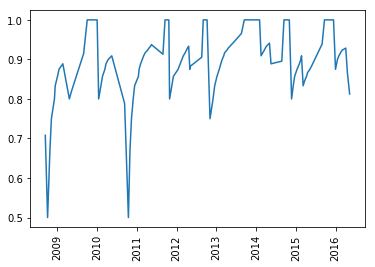

In [0]:
import pandas as pd
match_features_all_df = pd.read_csv('FINAL_ALL_FEATURES_NO_NAN.csv')

team_df = sql_to_dataframe(conn, select_all_query_table("Team"))
team_name_to_id_dict = get_team_name_to_team_api_id_dict(team_df)
CLUB = 'FC Barcelona'
barca_api_id = (int(team_name_to_id_dict[CLUB]))


# Factor this out into a function.
barca_home_win_rate = match_features_all_df[match_features_all_df['home_team_api_id'] == barca_api_id]

barca_home_win_rate.date = pd.to_datetime(barca_home_win_rate.date)
barca_home_win_rate = barca_home_win_rate.sort_values('date', ascending=True)
barca_home_win_rate=barca_home_win_rate.dropna(how='any')
barca_home_win_rate=barca_home_win_rate[barca_home_win_rate['HOME_WIN_RATE_THIS_SEASON'] != 0]
plt.plot(barca_home_win_rate['date'], barca_home_win_rate['HOME_WIN_RATE_THIS_SEASON'])
plt.xticks(rotation='vertical')

## Almost there..


Following steps:

* Convert form guide to labelled
* One hot encode the output labels.
* Drop metadata such as match_api_id, home_team_api_id etc.

In [0]:
import pandas as pd
from IPython.display import display
final_all_features = pd.read_csv('FINAL_ALL_FEATURES_NO_NAN.csv')


# Drop metadata
META_COLUMNS=['match_api_id', 'home_team_api_id', 'away_team_api_id', 'season', 'date']


final_all_features = final_all_features.drop(META_COLUMNS, axis =1)

# Drop na
display(final_all_features.shape)
final_all_features = final_all_features.dropna(axis = 0, how = 'any')
display(final_all_features.shape)

## Convert form guide to labelled
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(all_possibilities_form_guide_string_list)
final_all_features['HOME_TEAM_FORM_GUIDE'] = le.transform(final_all_features['HOME_TEAM_FORM_GUIDE'])
final_all_features['AWAY_TEAM_FORM_GUIDE'] = le.transform(final_all_features['AWAY_TEAM_FORM_GUIDE'])


LABELS = ['HOME_WIN', 'AWAY_WIN', 'DRAW']
le.fit(LABELS)
transformed_labels = le.transform(final_all_features['result_label'])

# Draw features and labels
le_draw = preprocessing.LabelEncoder()
DRAW_LABELS = ['HOME_WIN', 'AWAY_WIN']
le_draw.fit(DRAW_LABELS)
final_all_features_no_draws = final_all_features[final_all_features['result_label'] != 'DRAW']
transformed_labels_no_draws = le_draw.transform(final_all_features_no_draws['result_label'])

final_all_features = final_all_features.drop(['result_label'], axis =1)
final_all_features_no_draws = final_all_features_no_draws.drop(['result_label'], axis =1)

display(final_all_features.dtypes)


(21374, 23)

(21360, 23)

num_top_players_home              int64
num_top_players_away              int64
num_bottom_players_home           int64
num_bottom_players_away           int64
away_Attacker_rating            float64
home_Attacker_rating            float64
away_Defender_rating            float64
home_Defender_rating            float64
away_Goalkeeper_rating          float64
home_Goalkeeper_rating          float64
away_Midfielder_rating          float64
home_Midfielder_rating          float64
HEAD_2_HEAD_HOME_TEAM_WINS      float64
HEAD_2_HEAD_HOME_TEAM_LOSS      float64
HEAD_2_HEAD_DRAW                float64
HOME_WIN_RATE                   float64
HOME_WIN_RATE_THIS_SEASON       float64
AWAY_WIN_RATE                   float64
AWAY_WIN_RATE_THIS_SEASON       float64
AWAY_WIN_RATE_AT_THIS_GROUND    float64
HOME_TEAM_FORM_GUIDE              int64
AWAY_TEAM_FORM_GUIDE              int64
dtype: object

# Model Fitting and Optimization

Now that we have our features all encoded, and ready to go; we can try various classifiers. First, we will shuffle and split the data. 

### Shuffle and split

In [0]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_all_features, 
                                                    transformed_labels, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 16020 samples.
Testing set has 5340 samples.


### A training and predicting pipeline

In [0]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = clf.predict(X_test)
    predictions_train = clf.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    
    betaValue = 0.6
    
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=betaValue,
                                     average='micro')
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=betaValue, 
                                    average='micro')  
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

QuadraticDiscriminantAnalysis trained on 160 samples.
QuadraticDiscriminantAnalysis trained on 1602 samples.
QuadraticDiscriminantAnalysis trained on 16020 samples.
MLPClassifier trained on 160 samples.
MLPClassifier trained on 1602 samples.
MLPClassifier trained on 16020 samples.
AdaBoostClassifier trained on 160 samples.
AdaBoostClassifier trained on 1602 samples.
AdaBoostClassifier trained on 16020 samples.


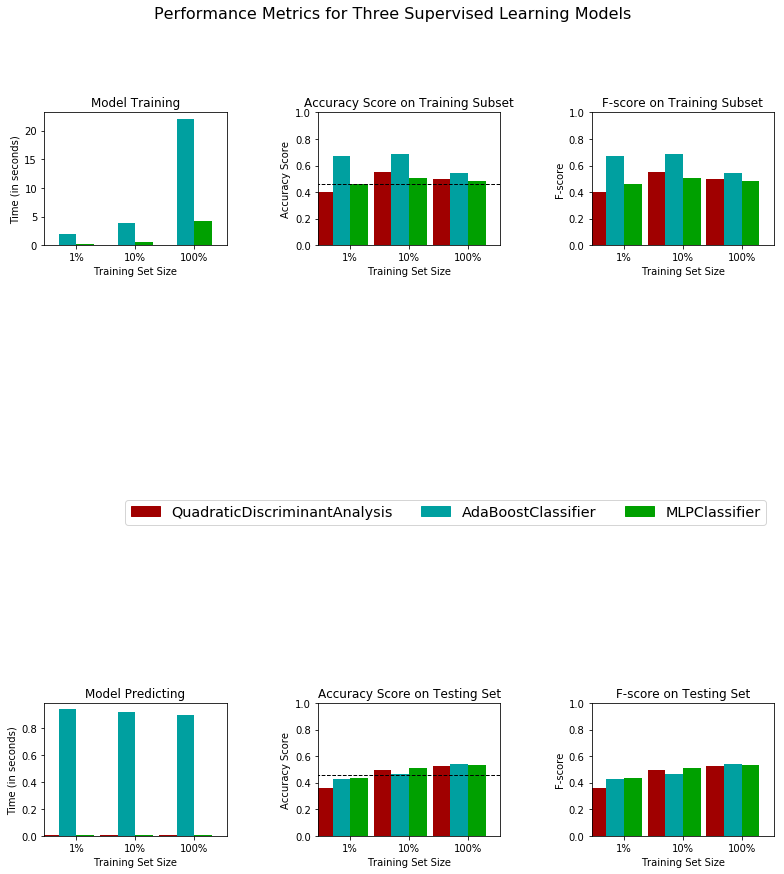

In [0]:

# TODO: Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from math import floor
# TODO: Initialize the three models
clf_A = QuadraticDiscriminantAnalysis()
# TODO: Check deep learning
clf_B = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 15), random_state=1)
clf_C = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(.10 * len(y_train))
samples_1 = int(.01 * len(y_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
# Run metrics visualization for the three supervised learning models chosen
DUMMY_BASE_ACCURACY = 0.46
DUMMY_BASE_F_SCORE = 0.1
evaluate(results, DUMMY_BASE_ACCURACY)

In [0]:
print results['AdaBoostClassifier'][2]

{'pred_time': 0.9017088413238525, 'f_test': 0.543445692883895, 'train_time': 22.070371866226196, 'acc_train': 0.5433333333333333, 'acc_test': 0.5434456928838951, 'f_train': 0.5433333333333333}


[('AWAY_WIN_RATE_AT_THIS_GROUND', 11.600000000000001), ('home_Midfielder_rating', 9.9), ('AWAY_WIN_RATE', 8.0), ('away_Midfielder_rating', 8.0), ('HOME_WIN_RATE', 7.8), ('home_Defender_rating', 7.8), ('away_Defender_rating', 6.6000000000000005), ('home_Attacker_rating', 5.6000000000000005), ('HOME_TEAM_FORM_GUIDE', 5.3), ('away_Attacker_rating', 4.2), ('HEAD_2_HEAD_DRAW', 3.8)]


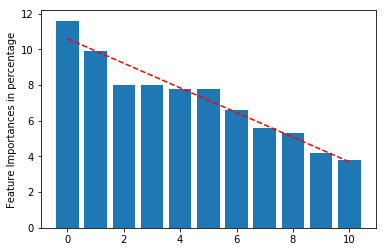

In [0]:
NUM_FEATURES = 12
dict_feature_names_to_importances = dict(zip(X_train.columns, clf_C.feature_importances_ * 100))
sorted_tuples = sorted(dict_feature_names_to_importances.items(), key=lambda x:x[1], reverse=True)
print sorted_tuples[0: NUM_FEATURES - 1]
# REFERENCE FOR GRAPH CODE: Thanks to https://stackoverflow.com/questions/13925251/python-bar-plot-from-list-of-tuples

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
feature_names = zip(*sorted_tuples[0: NUM_FEATURES - 1])[0]
importances = zip(*sorted_tuples[0: NUM_FEATURES - 1])[1]
x_pos = np.arange(len(feature_names)) 

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, importances, 1)
trendline = intercept + (slope * x_pos)

plt.plot(x_pos, trendline, color='red', linestyle='--')    
plt.bar(x_pos, importances,align='center')
plt.ylabel('Feature Importances in percentage')
plt.show()

### Notes About Feature Importance 
- Interesting that the away win rate at this ground has the highest importance.
- Good to see form guides having some importance!

Seems that the features number of top players home/away, num of bottom players home/away are not useful at all. Lets drop the correlation matrix between the features.

#### Confusion Matrix
In the code cell below, we plot the confusion matrix for both the base case (always predicting a HOME_WIN); and a confusion matrix for the AdaBoost Classifier.

******************************************************************
Confusion matrix for base case
Normalized confusion matrix
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
******************************************************************
Confusion matrix for AdaBoost classifier
Normalized confusion matrix
[[0.51 0.08 0.41]
 [0.23 0.11 0.66]
 [0.14 0.06 0.8 ]]


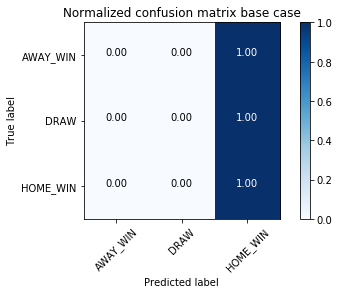

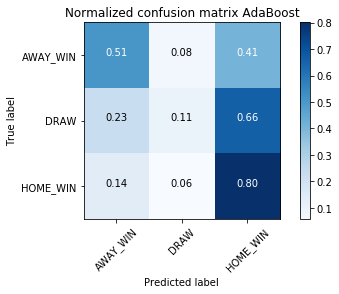

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

'''
CONFUSIOM MATRIX FOR BASE CASE
'''
y_base_pred = y_test.copy()
y_base_pred[:] = le.transform(['HOME_WIN'])
cnf_base_case_matrix = confusion_matrix(y_test, y_base_pred)

'''
CONFUSIOM MATRIX FOR ADABOOST
'''
y_pred = clf_C.predict(X_test)
cnf_matrix_adaboost = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)


CLASSES_NAME = le.inverse_transform([0,1,2])

print "******************************************************************"
print "Confusion matrix for base case"
plt.figure()
plot_confusion_matrix(cnf_base_case_matrix, classes=CLASSES_NAME, normalize=True,
                      title='Normalized confusion matrix base case')

print "******************************************************************"
print "Confusion matrix for AdaBoost classifier"
plt.figure()
plot_confusion_matrix(cnf_matrix_adaboost, classes=CLASSES_NAME, normalize=True,
                      title='Normalized confusion matrix AdaBoost')



### Hyperparameter tuning

It does seem that AdaBoost is the bect classifier for this task. We will try to tune the hyperparameters for the classifier.

In [0]:
!cat /proc/cpuinfo | grep processor

processor	: 0
processor	: 1


In [0]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
# TODO: Initialize the classifier
clf = AdaBoostClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
# We choose to perform a grid search on two params: the algorithm used for boosting and the number of estimators (early termination to avoid overfitting)
'''
MY BASE CLASSIFIER
clf_C = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)
'''
parameters = {'base_estimator': [tree.DecisionTreeClassifier(max_depth=1),
                                tree.DecisionTreeClassifier(max_depth=2)], 
              'n_estimators': [1000], 
              'algorithm' : ['SAMME', 'SAMME.R'],
              'random_state' : [1]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()

grid_obj = GridSearchCV(clf, parameters, scoring = scorer, verbose = 5, n_jobs=2) #Turned the verbose option when I was running it

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:  3.2min remaining:    0.0s
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:  3.2min finished


In [0]:
# Get the estimator
best_clf = grid_fit.best_estimator_
print best_clf

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5, average='weighted'))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5, average='weighted'))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=1)
Unoptimized model
------
Accuracy score on testing data: 0.5421
F-score on testing data: 0.4635

Optimized Model
------
Final accuracy score on the testing data: 0.5434
Final F-score on the testing data: 0.4919


## Some observations based on best classifier's confusion matrix


#### Home Wins
Based on the confusion matrix for the best classifier, it is pity good at predicting home wins. Through statistics in the section above, home wins occur for 46% of the time; and if that's a punt people take on statistics; so predicting 80% is really good.

#### Away Wins
Away wins statistically occur 29% of the time, our model predicts the correct result for an away win 51% of the time.


#### Predicting draws..

As seen in the confusion matrix for my best classifier, AdaBoost; the model is very bad at predicting draws. Lets consider the accuracy of the model when we do not consider drawn matches.

**We did not generate features for draws, data such as away/home team's draw rate all time/ this season; could be helpful. So lets's try that!

### Generate and then nan-fill the draw data for the following five features
Same way it was done before

In [0]:
all_features_df = pd.read_csv('ALL_MATCH_FEATURES.csv')
FORM_STATS_FEATURES = ['match_api_id', 'home_team_api_id', 'away_team_api_id',
                   'season', 'date', 'result_label']
all_features_df['date'] = pd.to_datetime(all_features_df['date'])
match_sample = all_features_df

print "Getting home draw rate all time"
get_home_draw_rate = partial(home_team_all_time_home_draws, full_df=all_features_df)
match_sample['HOME_DRAW_RATE'] = match_sample.apply(get_home_draw_rate, axis = 1)

print "Getting home draw rate this season"
get_home_draw_rate_this_season = partial(home_team_this_season_home_draws, full_df=all_features_df)
match_sample['HOME_DRAW_RATE_THIS_SEASON'] = match_sample.apply(get_home_draw_rate_this_season, axis = 1)

print "Getting away draw rate all time"
get_away_draw_rate = partial(away_team_all_time_away_draws, full_df=all_features_df)
match_sample['AWAY_DRAW_RATE'] = match_sample.apply(get_away_draw_rate, axis = 1)

print "Getting away draw rate this season"
get_away_draw_rate_this_season = partial(away_team_this_season_away_draw, full_df=all_features_df)
match_sample['AWAY_DRAW_RATE_THIS_SEASON'] = match_sample.apply(get_away_draw_rate_this_season, axis = 1)

print "Getting away team's draw rate AT THIS GROUND"
get_away_draw_rate_at_this_ground = partial(away_team_all_time_away_draws_at_this_ground, full_df=all_features_df)
match_sample['AWAY_DRAW_RATE_AT_THIS_GROUND'] = match_sample.apply(get_away_draw_rate_at_this_ground, axis = 1)

COLUMNS = ['match_api_id', 'HOME_DRAW_RATE', 'HOME_DRAW_RATE_THIS_SEASON', 'AWAY_DRAW_RATE', 'AWAY_DRAW_RATE_THIS_SEASON',
          'AWAY_DRAW_RATE_AT_THIS_GROUND']

match_sample[COLUMNS].to_csv("draw_form_stats.csv")

Getting home draw rate all time
Getting home draw rate this season
Getting away draw rate all time
Getting away draw rate this season
Getting away team's draw rate AT THIS GROUND


### Nan fill draw data

In [0]:
from functools import partial
#match_features_sample = match_features_all_df[match_features_all_df['match_api_id']==493017]
match_features_all_df = pd.read_csv('draw_join_features.csv')
match_features_sample = match_features_all_df
COLUMNS_TO_NAN_FILL= ['HOME_DRAW_RATE', 'HOME_DRAW_RATE_THIS_SEASON', 'AWAY_DRAW_RATE', 'AWAY_DRAW_RATE_THIS_SEASON',
          'AWAY_DRAW_RATE_AT_THIS_GROUND']

display(match_features_sample[COLUMNS_TO_NAN_FILL].shape)

print "Filling NaN for home team all time draw rate"
nan_fill_home_team_draw_rate_all_time = partial(fill_nan_home_team_draw_rate_all_time, full_df=match_features_all_df)
match_features_sample['HOME_DRAW_RATE'] = match_features_sample.apply(nan_fill_home_team_draw_rate_all_time, axis = 1)

print "Filling NaN for away team all time draw rate"
nan_fill_away_team_draw_rate_all_time = partial(fill_nan_away_team_draw_rate_all_time, full_df=match_features_all_df)
match_features_sample['AWAY_DRAW_RATE'] = match_features_sample.apply(nan_fill_away_team_draw_rate_all_time, axis = 1)

print "Filling NaN for home team draw rate this season"
nan_fill_home_team_draw_rate_this_season = partial(fill_nan_home_team_draw_rate_this_season, full_df=match_features_all_df)
match_features_sample['HOME_DRAW_RATE_THIS_SEASON'] = match_features_sample.apply(nan_fill_home_team_draw_rate_this_season, axis = 1)

print "Filling NaN for away team draw rate this season"
nan_fill_away_team_draw_rate_this_season = partial(fill_nan_away_team_draw_rate_this_season, full_df=match_features_all_df)
match_features_sample['AWAY_DRAW_RATE_THIS_SEASON'] = match_features_sample.apply(nan_fill_away_team_draw_rate_this_season, axis = 1)

print "Filling NaN for away team draw rate at this ground"
nan_fill_away_team_draw_rate_at_this_ground = partial(fill_nan_away_team_win_rate_all_time_at_this_ground, full_df=match_features_all_df)
match_features_sample['AWAY_DRAW_RATE_AT_THIS_GROUND'] = match_features_sample.apply(nan_fill_away_team_draw_rate_at_this_ground, axis = 1)


display(match_features_sample[COLUMNS_TO_NAN_FILL].shape)

for column in COLUMNS_TO_NAN_FILL:
    if (match_features_sample[column].isnull().values.any()):
        print (column)
        #raise Exception

match_features_sample.to_csv('FINAL_ALL_FEATURES_WITH_DRAWS_NO_NAN.csv')



(21374, 5)

Filling NaN for home team all time draw rate
Filling NaN for away team all time draw rate
Filling NaN for home team draw rate this season
Filling NaN for away team draw rate this season
Filling NaN for away team draw rate at this ground


(21374, 5)

HOME_DRAW_RATE_THIS_SEASON


# Running without draws

## Run again, this time without the draw data

In [60]:
import pandas as pd
from IPython.display import display
final_all_features_with_draw_data = pd.read_csv('FINAL_ALL_FEATURES_WITH_DRAWS_NO_NAN.csv')


# Drop metadata
META_COLUMNS=['match_api_id', 'home_team_api_id', 'away_team_api_id', 'season', 'date']


final_all_features_with_draw_data = final_all_features_with_draw_data.drop(META_COLUMNS, axis =1)

# Drop na
display(final_all_features_with_draw_data.shape)
final_all_features_with_draw_data = final_all_features_with_draw_data.dropna(axis = 0, how = 'any')
display(final_all_features_with_draw_data.shape)

## Convert form guide to labelled

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(all_possibilities_form_guide_string_list)
final_all_features_with_draw_data['HOME_TEAM_FORM_GUIDE'] = le.transform(final_all_features_with_draw_data['HOME_TEAM_FORM_GUIDE'])
final_all_features_with_draw_data['AWAY_TEAM_FORM_GUIDE'] = le.transform(final_all_features_with_draw_data['AWAY_TEAM_FORM_GUIDE'])



le = preprocessing.LabelEncoder()
LABELS = ['HOME_WIN', 'AWAY_WIN', 'DRAW']
le.fit(LABELS)
transformed_labels_draw = le.transform(final_all_features_with_draw_data['result_label'])

final_all_features_with_draw_data = final_all_features_with_draw_data.drop(['result_label'], axis =1)
display(final_all_features_with_draw_data.sample(n=10))


(21374, 29)

(21360, 29)

,Unnamed: 0,HOME_DRAW_RATE,HOME_DRAW_RATE_THIS_SEASON,AWAY_DRAW_RATE,AWAY_DRAW_RATE_THIS_SEASON,AWAY_DRAW_RATE_AT_THIS_GROUND,num_top_players_home,num_top_players_away,num_bottom_players_home,num_bottom_players_away,away_Attacker_rating,home_Attacker_rating,away_Defender_rating,home_Defender_rating,away_Goalkeeper_rating,home_Goalkeeper_rating,away_Midfielder_rating,home_Midfielder_rating,HEAD_2_HEAD_HOME_TEAM_WINS,HEAD_2_HEAD_HOME_TEAM_LOSS,HEAD_2_HEAD_DRAW,HOME_WIN_RATE,HOME_WIN_RATE_THIS_SEASON,AWAY_WIN_RATE,AWAY_WIN_RATE_THIS_SEASON,AWAY_WIN_RATE_AT_THIS_GROUND,HOME_TEAM_FORM_GUIDE,AWAY_TEAM_FORM_GUIDE
13728,13728,0.258824,0.472425,0.240964,0.008073,0.000000,0,0,0,0,68.0,72.000000,66.000000,69.000000,60.0,69.0,67.800000,70.600000,0.700000,0.100000,0.200000,0.647059,0.419408,0.228916,0.008073,0.000000,133,15
5015,5015,0.239130,0.363636,0.187500,0.333333,0.000000,4,0,0,0,75.0,77.333333,72.500000,80.000000,75.0,83.0,74.400000,77.600000,0.600000,0.000000,0.400000,0.608696,0.545455,0.229167,0.333333,0.000000,222,156
21084,21084,0.428571,0.500000,0.323232,0.000000,1.000000,0,0,0,0,69.5,56.000000,69.750000,58.750000,71.0,54.0,70.750000,58.600000,0.000000,1.000000,0.000000,0.142857,0.166667,0.484848,0.666667,1.000000,167,227
3616,3616,0.333333,0.333333,0.242188,0.294118,1.000000,0,11,0,0,81.0,71.500000,81.500000,71.250000,85.0,76.0,83.600000,72.750000,0.000000,1.000000,0.000000,0.266667,0.266667,0.500000,0.588235,1.000000,241,80
20848,20848,0.218750,0.266667,0.308824,0.266667,0.333333,1,0,0,0,0.0,63.666667,63.500000,60.000000,65.0,59.0,64.666667,62.166667,0.142857,0.571429,0.285714,0.343750,0.266667,0.250000,0.200000,0.333333,118,141
10091,10091,0.222222,0.314839,0.200000,0.083545,0.000000,1,0,0,0,75.0,77.000000,70.400000,76.250000,70.0,79.0,75.666667,73.750000,0.333333,0.333333,0.333333,0.666667,0.428842,0.228571,0.083545,0.000000,232,115
20873,20873,0.157895,0.500000,0.210526,0.500000,0.000000,0,0,0,0,64.5,70.000000,60.750000,69.333333,56.0,76.0,59.250000,69.500000,1.000000,0.000000,0.000000,0.719298,0.500000,0.052632,0.000000,0.000000,164,129
386,386,0.625000,0.625000,0.310345,0.222222,0.000000,0,0,0,0,66.5,62.000000,65.000000,64.000000,65.0,69.0,66.000000,64.500000,0.000000,0.000000,1.000000,0.125000,0.125000,0.137931,0.333333,0.000000,95,227
10104,10104,0.227273,0.250000,0.275000,0.250000,1.000000,1,5,0,0,85.0,74.500000,78.166667,71.000000,79.0,76.0,80.000000,74.333333,0.000000,0.500000,0.500000,0.500000,0.250000,0.425000,0.500000,1.000000,121,161
17019,17019,0.156250,0.166667,0.250000,0.000000,0.000000,0,0,0,0,63.0,71.666667,0.000000,72.666667,66.0,75.0,61.375000,66.500000,0.875000,0.062500,0.062500,0.781250,0.833333,0.152174,0.200000,0.000000,233,148


In [62]:

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train_draw, X_test_draw, y_train_draw, y_test_draw = train_test_split(final_all_features_with_draw_data, 
                                                    transformed_labels_draw, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train_draw.shape[0])
print "Testing set has {} samples.".format(X_test_draw.shape[0])

Training set has 16020 samples.
Testing set has 5340 samples.


QuadraticDiscriminantAnalysis trained on 160 samples.
QuadraticDiscriminantAnalysis trained on 1602 samples.
QuadraticDiscriminantAnalysis trained on 16020 samples.
MLPClassifier trained on 160 samples.
MLPClassifier trained on 1602 samples.
MLPClassifier trained on 16020 samples.
AdaBoostClassifier trained on 160 samples.
AdaBoostClassifier trained on 1602 samples.
AdaBoostClassifier trained on 16020 samples.


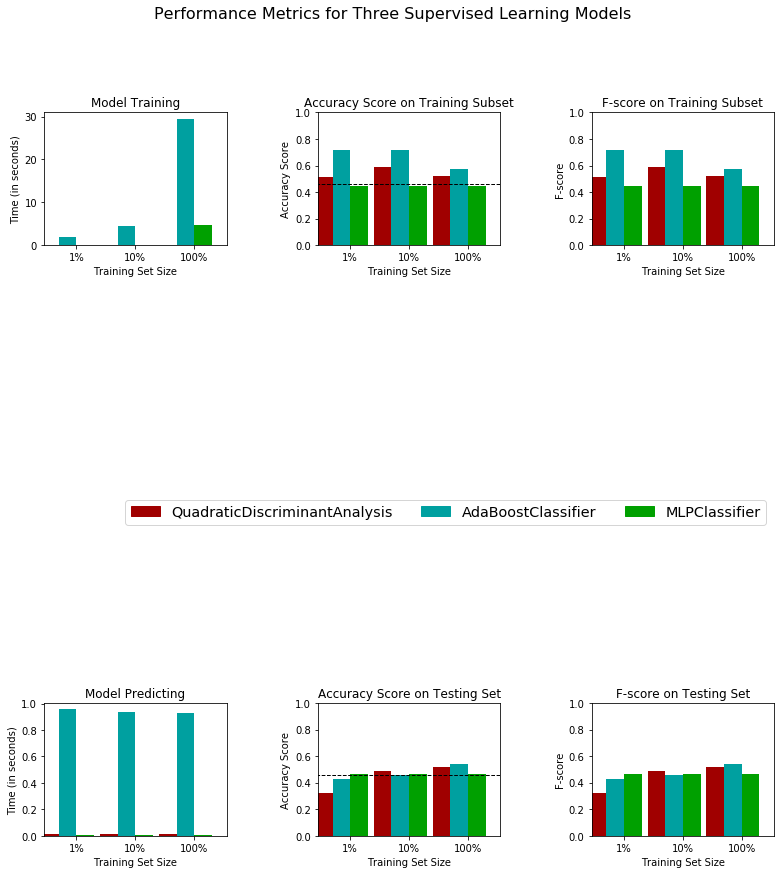

In [64]:
samples_100 = len(y_train_draw)
samples_10 = int(.10 * len(y_train_draw))
samples_1 = int(.01 * len(y_train_draw))

clf_A = QuadraticDiscriminantAnalysis()
# Initializing with n_neighbors = 3
# TODO: Check deep learning
clf_B = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 15), random_state=1)
clf_C = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train_draw, y_train_draw, X_test_draw, y_test_draw)
# Run metrics visualization for the three supervised learning models chosen
DUMMY_BASE_ACCURACY = 0.46
evaluate(results, DUMMY_BASE_ACCURACY)

In [65]:
print results['AdaBoostClassifier'][2]

{'pred_time': 0.9320709705352783, 'f_test': 0.5395131086142322, 'train_time': 29.49895191192627, 'acc_train': 0.5733333333333334, 'acc_test': 0.5395131086142322, 'f_train': 0.5733333333333333}


Normalized confusion matrix
[[0.5  0.09 0.41]
 [0.24 0.12 0.65]
 [0.14 0.07 0.79]]
Normalized confusion matrix
[[0.51 0.08 0.41]
 [0.23 0.11 0.66]
 [0.14 0.06 0.8 ]]


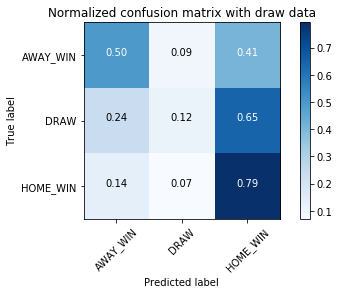

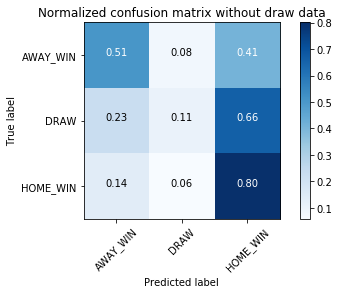

In [66]:
'''
CONFUSIOM MATRIX FOR ADABOOST
'''
y_pred_draw = clf_C.predict(X_test_draw)
cnf_matrix_adaboost_with_draw_data = confusion_matrix(y_test_draw, y_pred_draw)
np.set_printoptions(precision=2)


CLASSES_NAME = le.inverse_transform([0,1,2])


plt.figure()
plot_confusion_matrix(cnf_matrix_adaboost_with_draw_data, classes=CLASSES_NAME, normalize=True,
                      title='Normalized confusion matrix with draw data')

plt.figure()
plot_confusion_matrix(cnf_matrix_adaboost, classes=CLASSES_NAME, normalize=True,
                      title='Normalized confusion matrix without draw data')

In [67]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
# TODO: Initialize the classifier
clf = AdaBoostClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
# I choose to perform a grid search on two params: the algorithm used for boosting and the number of estimators (early termination to avoid overfitting)
'''
MY BASE CLASSIFIER
clf_C = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)
                         
'''
parameters = {'base_estimator': [tree.DecisionTreeClassifier(max_depth=1),
                                tree.DecisionTreeClassifier(max_depth=2)], 
              'n_estimators': [1000], 
              'algorithm' : ['SAMME', 'SAMME.R'],
              'random_state' : [1]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()

grid_obj = GridSearchCV(clf, parameters, scoring = scorer, verbose = 5, n_jobs=2) #Turned the verbose option when I was running it

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_draw, y_train_draw)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:  4.3min finished


In [68]:
# Get the estimator
best_clf = grid_fit.best_estimator_
print best_clf

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_draw, y_train_draw)).predict(X_test_draw)
best_predictions = best_clf.predict(X_test_draw)

# Report the before-and-afterscores
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test_draw, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test_draw, best_predictions, beta = 0.5, average='weighted'))

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=1)

Optimized Model
------
Final accuracy score on the testing data: 0.5507
Final F-score on the testing data: 0.4915


### The final accuracy obtained with the optimized classifier is 55.31%

I will see if the accuracy is better, for data without any draws.

Considering data without any draws..
Training set has (11973, 22) samples.
Testing set has (3991, 22) samples.
QuadraticDiscriminantAnalysis trained on 119 samples.
QuadraticDiscriminantAnalysis trained on 1197 samples.
QuadraticDiscriminantAnalysis trained on 11973 samples.
MLPClassifier trained on 119 samples.
MLPClassifier trained on 1197 samples.
MLPClassifier trained on 11973 samples.
AdaBoostClassifier trained on 119 samples.
AdaBoostClassifier trained on 1197 samples.
AdaBoostClassifier trained on 11973 samples.


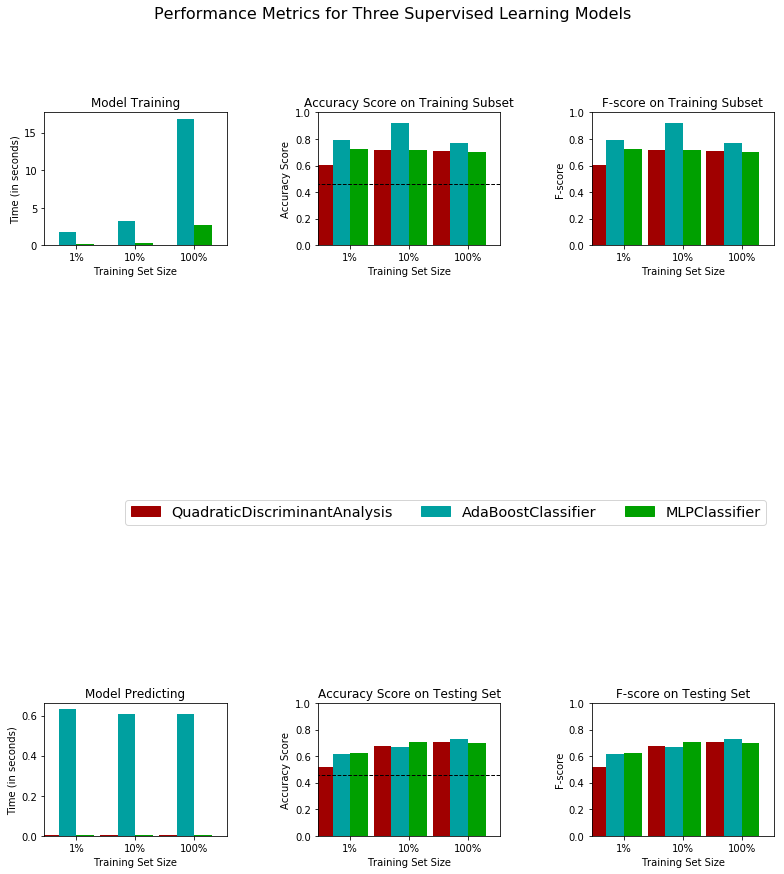

In [72]:
# Import train_test_split
print "Considering data without any draws.."
# Split the 'features' and 'income' data into training and testing sets
X_train_no_draw, X_test_no_draw, y_train_no_draw, y_test_no_draw = train_test_split(final_all_features_no_draws, 
                                                    transformed_labels_no_draws, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train_no_draw.shape)
print "Testing set has {} samples.".format(X_test_no_draw.shape)

samples_100 = len(y_train_no_draw)
samples_10 = int(.10 * len(y_train_no_draw))
samples_1 = int(.01 * len(y_train_no_draw))
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train_no_draw, y_train_no_draw, 
                                             X_test_no_draw, y_test_no_draw)
# Run metrics visualization for the three supervised learning models chosen
DUMMY_BASE_ACCURACY = 0.46

evaluate(results, DUMMY_BASE_ACCURACY)

### Confusion Matrix for no draws

{0: {'pred_time': 0.6314511299133301, 'f_test': 0.614382360310699, 'train_time': 1.8095200061798096, 'acc_train': 0.79, 'acc_test': 0.614382360310699, 'f_train': 0.79}, 1: {'pred_time': 0.6086199283599854, 'f_test': 0.6677524429967426, 'train_time': 3.255916118621826, 'acc_train': 0.9233333333333333, 'acc_test': 0.6677524429967426, 'f_train': 0.9233333333333332}, 2: {'pred_time': 0.607637882232666, 'f_test': 0.7321473314958657, 'train_time': 16.852654933929443, 'acc_train': 0.77, 'acc_test': 0.7321473314958657, 'f_train': 0.7699999999999999}}
******************************************************************
Confusion matrix for AdaBoost classifier
Normalized confusion matrix
[[0.54 0.46]
 [0.15 0.85]]


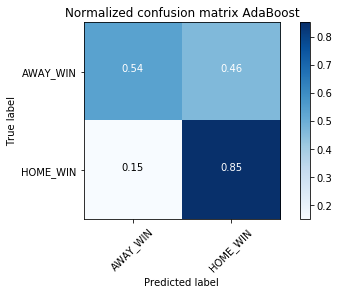

In [73]:
print results['AdaBoostClassifier']

'''
CONFUSIOM MATRIX FOR ADABOOST
'''
y_pred = clf_C.predict(X_test_no_draw)
cnf_matrix_adaboost_no_draws = confusion_matrix(y_test_no_draw, y_pred)
np.set_printoptions(precision=2)


CLASSES_NAME = le_draw.inverse_transform([0,1])

print "******************************************************************"
print "Confusion matrix for AdaBoost classifier"
plt.figure()
plot_confusion_matrix(cnf_matrix_adaboost_no_draws, classes=CLASSES_NAME, normalize=True,
                      title='Normalized confusion matrix AdaBoost')


## Prediction Results and Optimizations

#### Across different countries

In [74]:
final_all_features_with_draw_data = pd.read_csv('FINAL_ALL_FEATURES_WITH_DRAWS_NO_NAN.csv')

match_df = sql_to_dataframe(conn, select_all_query_table("Match"))
match_df = match_df[['match_api_id', 'country_id']]

JOIN_COLUMNS = ['match_api_id']

match_features_with_country_df = pd.merge(final_all_features_with_draw_data, match_df,  how='left',
                  left_on=JOIN_COLUMNS, right_on=JOIN_COLUMNS, suffixes=('', '_y'))
match_features_with_country_df = match_features_with_country_df[match_features_with_country_df.columns.drop(list(match_features_with_country_df.filter(regex='_y')))]
display(match_features_with_country_df.sample(n=10))

,Unnamed: 0,match_api_id,HOME_DRAW_RATE,HOME_DRAW_RATE_THIS_SEASON,AWAY_DRAW_RATE,AWAY_DRAW_RATE_THIS_SEASON,AWAY_DRAW_RATE_AT_THIS_GROUND,num_top_players_home,num_top_players_away,num_bottom_players_home,num_bottom_players_away,home_team_api_id,away_team_api_id,season,date,result_label,away_Attacker_rating,home_Attacker_rating,away_Defender_rating,home_Defender_rating,away_Goalkeeper_rating,home_Goalkeeper_rating,away_Midfielder_rating,home_Midfielder_rating,HEAD_2_HEAD_HOME_TEAM_WINS,HEAD_2_HEAD_HOME_TEAM_LOSS,HEAD_2_HEAD_DRAW,HOME_WIN_RATE,HOME_WIN_RATE_THIS_SEASON,AWAY_WIN_RATE,AWAY_WIN_RATE_THIS_SEASON,AWAY_WIN_RATE_AT_THIS_GROUND,HOME_TEAM_FORM_GUIDE,AWAY_TEAM_FORM_GUIDE,country_id
20157,20157,2030130,0.305556,0.500000,0.303371,0.500000,0.500000,0,0,0,0,8603,9783,2015/2016,9/24/15,AWAY_WIN,74.000000,76.500000,75.40,73.800000,76.0,75.0,74.500000,77.000000,0.250000,0.250000,0.500000,0.333333,0.500000,0.168539,0.500000,0.500000,WLDDL,DWWDD,21518
3234,3234,1474973,0.246914,0.416667,0.240385,0.250000,0.500000,0,10,0,0,8659,8455,2013/2014,2/11/14,DRAW,82.000000,70.000000,80.25,69.750000,85.0,78.0,83.200000,75.500000,0.222222,0.666667,0.111111,0.370370,0.250000,0.480769,0.500000,0.500000,LDLDL,WWDWW,1729
4785,4785,654743,0.171429,0.250000,0.214286,0.058824,0.000000,1,0,0,0,9847,9873,2009/2010,5/5/10,DRAW,0.000000,78.000000,70.40,73.333333,75.0,70.0,70.600000,77.600000,0.333333,0.333333,0.333333,0.571429,0.500000,0.250000,0.411765,0.000000,LDDWD,DWDLL,4769
4702,4702,654495,0.285714,0.285714,0.290323,0.307692,0.000000,0,0,1,0,8588,9874,2009/2010,3/20/10,DRAW,67.000000,0.000000,70.00,69.250000,64.0,75.0,70.000000,68.000000,1.000000,0.000000,0.000000,0.500000,0.500000,0.129032,0.153846,0.000000,LDLWL,LWLLD,4769
4346,4346,483406,0.416667,0.416667,0.153846,0.153846,0.128912,3,0,0,0,9827,9831,2008/2009,3/14/09,HOME_WIN,74.500000,77.000000,73.00,77.333333,74.0,78.0,71.666667,79.333333,0.000000,0.000000,1.000000,0.583333,0.583333,0.384615,0.384615,0.128912,LWDDL,DLLWL,4769
18831,18831,1260319,0.083333,0.250000,0.177778,0.250000,0.000000,8,0,0,0,8633,8560,2012/2013,1/6/13,HOME_WIN,76.333333,89.000000,73.25,79.500000,79.0,72.0,74.333333,82.333333,1.000000,0.000000,0.000000,0.819444,0.750000,0.177778,0.250000,0.000000,LDWWL,WDDWD,21518
18506,18506,1051855,0.208333,0.200000,0.258621,0.444444,0.000000,0,0,0,0,8581,8696,2011/2012,2/4/12,DRAW,71.000000,77.000000,72.25,71.250000,66.0,74.0,70.800000,73.400000,0.333333,0.000000,0.666667,0.583333,0.600000,0.258621,0.111111,0.000000,LDLDL,DLWWD,21518
11878,11878,2060530,0.240741,0.285714,0.250000,0.166667,0.666667,0,9,0,0,8540,9885,2015/2016,11/29/15,AWAY_WIN,80.000000,74.000000,83.50,70.500000,84.0,77.0,82.250000,72.200000,0.416667,0.583333,0.000000,0.500000,0.285714,0.530303,0.333333,0.666667,DWLLD,WWWLW,10257
7969,7969,1030179,0.142857,0.000000,0.258621,0.250000,0.333333,3,0,0,0,10189,10269,2011/2012,1/21/12,HOME_WIN,76.500000,80.333333,75.00,75.750000,77.0,71.0,76.666667,73.333333,0.285714,0.571429,0.142857,0.571429,0.777778,0.344828,0.250000,0.333333,WWWLW,LLDLW,7809
14957,14957,1042945,0.571429,0.571429,0.200000,0.200000,0.113864,0,0,0,0,4064,9764,2011/2012,1/14/12,DRAW,72.000000,62.500000,64.75,64.000000,66.0,67.0,64.600000,66.750000,0.330000,0.330000,0.330000,0.285714,0.285714,0.200000,0.200000,0.113864,WWLLD,LLDDW,17642


In [0]:
countries_df = sql_to_dataframe(conn, select_all_query_table("Country"))
country_id_to_country_name = dict(zip(countries_df.id, countries_df.name))

In [76]:
# Split by country level
accuracy_per_country = dict()
for country_id in country_id_to_country_name:
    print "****************************************************"
    print ("Processing for country " + country_id_to_country_name[country_id])
    # Drop metadata
    META_COLUMNS=['match_api_id', 'home_team_api_id', 'away_team_api_id', 'season', 'date', 'country_id']

    final_all_features_country = match_features_with_country_df[match_features_with_country_df['country_id'] == country_id]
    #display(final_all_features_country.sample(n=10))
    
    final_all_features_country = final_all_features_country.drop(META_COLUMNS, axis =1)
    final_all_features_country = final_all_features_country.dropna(axis = 0, how = 'any')

    print "Total samples are " + str(final_all_features_country.shape[0])
    le = preprocessing.LabelEncoder()
    le.fit(all_possibilities_form_guide_string_list)
    final_all_features_country['HOME_TEAM_FORM_GUIDE'] = le.transform(final_all_features_country['HOME_TEAM_FORM_GUIDE'])
    final_all_features_country['AWAY_TEAM_FORM_GUIDE'] = le.transform(final_all_features_country['AWAY_TEAM_FORM_GUIDE'])


    LABELS = ['HOME_WIN', 'AWAY_WIN', 'DRAW']
    le.fit(LABELS)
    transformed_labels_country = le.transform(final_all_features_country['result_label'])
    final_all_features_country = final_all_features_country.drop(['result_label'], axis =1)
    
    # Split the 'features' and 'income' data into training and testing sets
    X_train_country, X_test_country, y_train_country, y_test_country = train_test_split(final_all_features_country, 
                                                    transformed_labels_country, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
    predictions_country = (best_clf.fit(X_train_country, y_train_country)).predict(X_test_country)
    accuracy_per_country[country_id_to_country_name[country_id]] = format(accuracy_score(y_test_country, predictions_country))
    print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test_country, predictions_country))
    print "****************************************************"

****************************************************
Processing for country Germany
Total samples are 2376
Final accuracy score on the testing data: 0.5105
****************************************************
****************************************************
Processing for country England
Total samples are 2962
Final accuracy score on the testing data: 0.5194
****************************************************
****************************************************
Processing for country Belgium
Total samples are 1212
Final accuracy score on the testing data: 0.4691
****************************************************
****************************************************
Processing for country Switzerland
Total samples are 1176
Final accuracy score on the testing data: 0.4025
****************************************************
****************************************************
Processing for country Poland
Total samples are 465
Final accuracy score on the testing data: 0.5269
******

{u'Netherlands': '0.506142506143', u'England': '0.519392917369', u'Portugal': '0.51171875', u'Poland': '0.52688172043', u'Scotland': '0.478964401294', u'France': '0.485165794066', u'Switzerland': '0.402542372881', u'Germany': '0.510504201681', u'Belgium': '0.469135802469', u'Italy': '0.490909090909', u'Spain': '0.518450184502'}
[u'Net', u'Eng', u'Por', u'Pol', u'Sco', u'Fra', u'Swi', u'Ger', u'Bel', u'Ita', u'Spa']


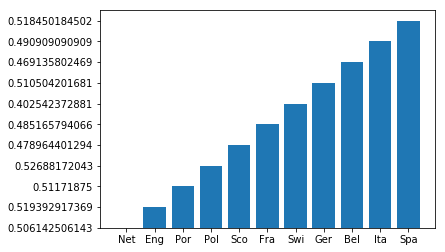

In [77]:
# PLot a bar chart
print accuracy_per_country
list_country = list()
for country in accuracy_per_country.keys():
    list_country.append(country[:3])
print list_country
    
plt.bar(range(len(accuracy_per_country)), accuracy_per_country.values(), align='center')
plt.xticks(range(len(accuracy_per_country)), list_country)

plt.show()

# Conclusion

Our work is a solid first effort towards predicting the outcome of football matches. We generated all the features using our domain knowledge, and found them relevant to the problem. Through this assignment we realized how important domain knowledge is, and how one must learn the domain first to do well on a machine learning problem.